# Grid Search

In [1]:
# imports
# add folder to syspath to import GeneticAlgorithm 
import os
import sys
path = os.path.dirname(os.path.dirname(os.path.abspath('')))
sys.path.insert(0, path+'/GeneticAlgorithm')
from GeneticAlgorithm import GeneticAlgorithm

# add folder to syspath to import ParticleSwarmOptimization
sys.path.insert(0, os.path.dirname(path)+'/ParticleSwarmOptimization')
 # add folder to syspath to import ACO 
sys.path.insert(0, os.path.dirname(path)+'/AntColonyOptimization')

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# lade die Probleme
# small problem
small_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_objects.npy'))
small_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_container.npy'))
small_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/small_optimal.npy'))
# medium Problem
medium_objects= np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_objects.npy'))
medium_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_container.npy'))
medium_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/medium_optimal.npy'))
# large Problem
large_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_objects.npy'))
large_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_container.npy'))
large_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/large_optimal.npy'))

print('Optimale Lösungen')
print(f'Kleines Problem {small_optimal_solution}')
print(f'Medium Problem {medium_optimal_solution}')
print(f'Großes Problem {large_optimal_solution}')

Optimale Lösungen
Kleines Problem 3
Medium Problem 16
Großes Problem 35


# Funktion

In [3]:
def plot_grid_search(objects, container, optimal_solution, xlim, ylim):
    # define parameter vals to be searched
    number_generations = 60
    population_size_vals = [20,40,60,80,100]
    crossover_probability_vals = [0.5,0.6,0.7,0.8,0.9]
    mutation_probability_vals = [0.02,0.04,0.06,0.08,0.1,0.15,0.2,0.25]
    fitness_function = 'fill'
    av_number = 10


    fig = [None] * len(population_size_vals)*2
    ax = [None] * len(population_size_vals)*2


    for index, pop_size in enumerate(population_size_vals):
        # Plot
        x_vals = np.arange(number_generations)
        # Punkte visualisieren
        fig[index], ax[index] = plt.subplots(4, figsize=(16,40))
        fig[index+(len(population_size_vals))],ax[index+(len(population_size_vals))] = plt.subplots(4, figsize=(16,40))
        ax[index][0].set_xlim(xlim)
        ax[index][0].set_ylim(ylim)
        ax[index][1].set_xlim(xlim)
        ax[index][1].set_ylim(ylim)
        ax[index][2].set_ylim(ylim)
        ax[index][2].set_xlim(xlim)
        ax[index][3].set_ylim(ylim)
        ax[index][3].set_xlim(xlim)
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][0].set_xlim(xlim)
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][0].set_ylim(ylim)
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][1].set_xlim(xlim)
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][1].set_ylim(ylim)
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][2].set_ylim(ylim)
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][2].set_xlim(xlim)
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][3].set_ylim(ylim)
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][3].set_xlim(xlim)
        fig[index].tight_layout(h_pad=6)
        fig[index+(len(population_size_vals))].tight_layout(h_pad=6)
        ax[index][0].set_title(f'Average Number of bins for {len(objects)} Objects and Population Size {pop_size} (averaged)')
        ax[index+(len(population_size_vals))][0].set_title(f'Best Number of bins for {len(objects)} Objects and Population Size {pop_size} (averaged)')
        ax[index][0].set_xlabel('Generation/Iteration')
        ax[index][0].set_ylabel("Number of Bins")
        ax[index][1].set_xlabel('Generation/Iteration')
        ax[index][1].set_ylabel("Number of Bins")
        ax[index][2].set_xlabel('Generation/Iteration')
        ax[index][2].set_ylabel("Number of Bins")
        ax[index][3].set_xlabel('Generation/Iteration')
        ax[index][3].set_ylabel("Number of Bins")
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][0].set_xlabel('Generation/Iteration')
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][0].set_ylabel("Number of Bins")
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][1].set_xlabel('Generation/Iteration')
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][1].set_ylabel("Number of Bins")
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][2].set_xlabel('Generation/Iteration')
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][2].set_ylabel("Number of Bins")
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][3].set_xlabel('Generation/Iteration')
        ax[index+(len(population_size_vals))],ax[index+(len(population_size_vals))][3].set_ylabel("Number of Bins")
        counter = 0
        for crossover_prob in crossover_probability_vals:
                for mutation_prob in mutation_probability_vals:
                    average_vals = np.zeros((av_number, number_generations))
                    best_vals = np.zeros((av_number, number_generations))
                    runtimes = np.zeros(av_number)
                    for i in np.arange(av_number):
                        GA = GeneticAlgorithm(objects, pop_size, container[0], container[1], crossover_prob, mutation_prob, number_generations, fitness_function, 'first_fit')
                        _,_, average_vals[i], best_vals[i],_, runtimes[i] = GA.run()
                    # calc average
                    average_vals = np.average(average_vals, 0)
                    best_vals = np.average(best_vals, 0)
                    runtime = np.average(runtimes)
                    if counter in range(0,10):
                        ax[index][0].plot(x_vals, average_vals, label = f'Mutation Prob: {mutation_prob}, Crossover Prob: {crossover_prob}, Population Size: {pop_size}, Runtime: {runtime}')
                        ax[index+(len(population_size_vals))][0].plot(x_vals, best_vals, label = f'Mutation Prob: {mutation_prob}, Crossover Prob: {crossover_prob}, Population Size: {pop_size}, Runtime: {runtime}')
                    if counter in range(10,20):
                        ax[index][1].plot(x_vals, average_vals, label = f'Mutation Prob: {mutation_prob}, Crossover Prob: {crossover_prob}, Population Size: {pop_size}, Runtime: {runtime}')
                        ax[index+(len(population_size_vals))][1].plot(x_vals, best_vals, label = f'Mutation Prob: {mutation_prob}, Crossover Prob: {crossover_prob}, Population Size: {pop_size}, Runtime: {runtime}')
                    if counter in range(20,30):
                        ax[index][2].plot(x_vals, average_vals, label = f'Mutation Prob: {mutation_prob}, Crossover Prob: {crossover_prob}, Population Size: {pop_size}, Runtime: {runtime}')
                        ax[index+(len(population_size_vals))][2].plot(x_vals, best_vals, label = f'Mutation Prob: {mutation_prob}, Crossover Prob: {crossover_prob}, Population Size: {pop_size}, Runtime: {runtime}')
                    if counter in range(30,40):
                        ax[index][3].plot(x_vals, average_vals, label = f'Mutation Prob: {mutation_prob}, Crossover Prob: {crossover_prob}, Population Size: {pop_size}, Runtime: {runtime}') 
                        ax[index+(len(population_size_vals))][3].plot(x_vals, best_vals, label = f'Mutation Prob: {mutation_prob}, Crossover Prob: {crossover_prob}, Population Size: {pop_size}, Runtime: {runtime}')
                    counter += 1
        ax[index][0].plot(x_vals, [optimal_solution]*len(x_vals), color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
        ax[index][1].plot(x_vals, [optimal_solution]*len(x_vals), color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
        ax[index][2].plot(x_vals, [optimal_solution]*len(x_vals), color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
        ax[index][3].plot(x_vals, [optimal_solution]*len(x_vals), color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
        ax[index][0].legend()
        ax[index][1].legend()
        ax[index][2].legend()
        ax[index][3].legend()
        ax[index+(len(population_size_vals))][0].plot(x_vals, [optimal_solution]*len(x_vals), color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
        ax[index+(len(population_size_vals))][1].plot(x_vals, [optimal_solution]*len(x_vals), color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
        ax[index+(len(population_size_vals))][2].plot(x_vals, [optimal_solution]*len(x_vals), color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
        ax[index+(len(population_size_vals))][3].plot(x_vals, [optimal_solution]*len(x_vals), color = "black",linestyle = 'dashed', label = f'Optimal Solution ({optimal_solution} Container)')
        ax[index+(len(population_size_vals))][0].legend()
        ax[index+(len(population_size_vals))][1].legend()
        ax[index+(len(population_size_vals))][2].legend()
        ax[index+(len(population_size_vals))][3].legend()
    plt.show()

## Small Problem

# Small Problem

In [4]:
plot_grid_search(small_objects, small_container, small_optimal_solution, [0,60], [2,5])

# Medium Problem

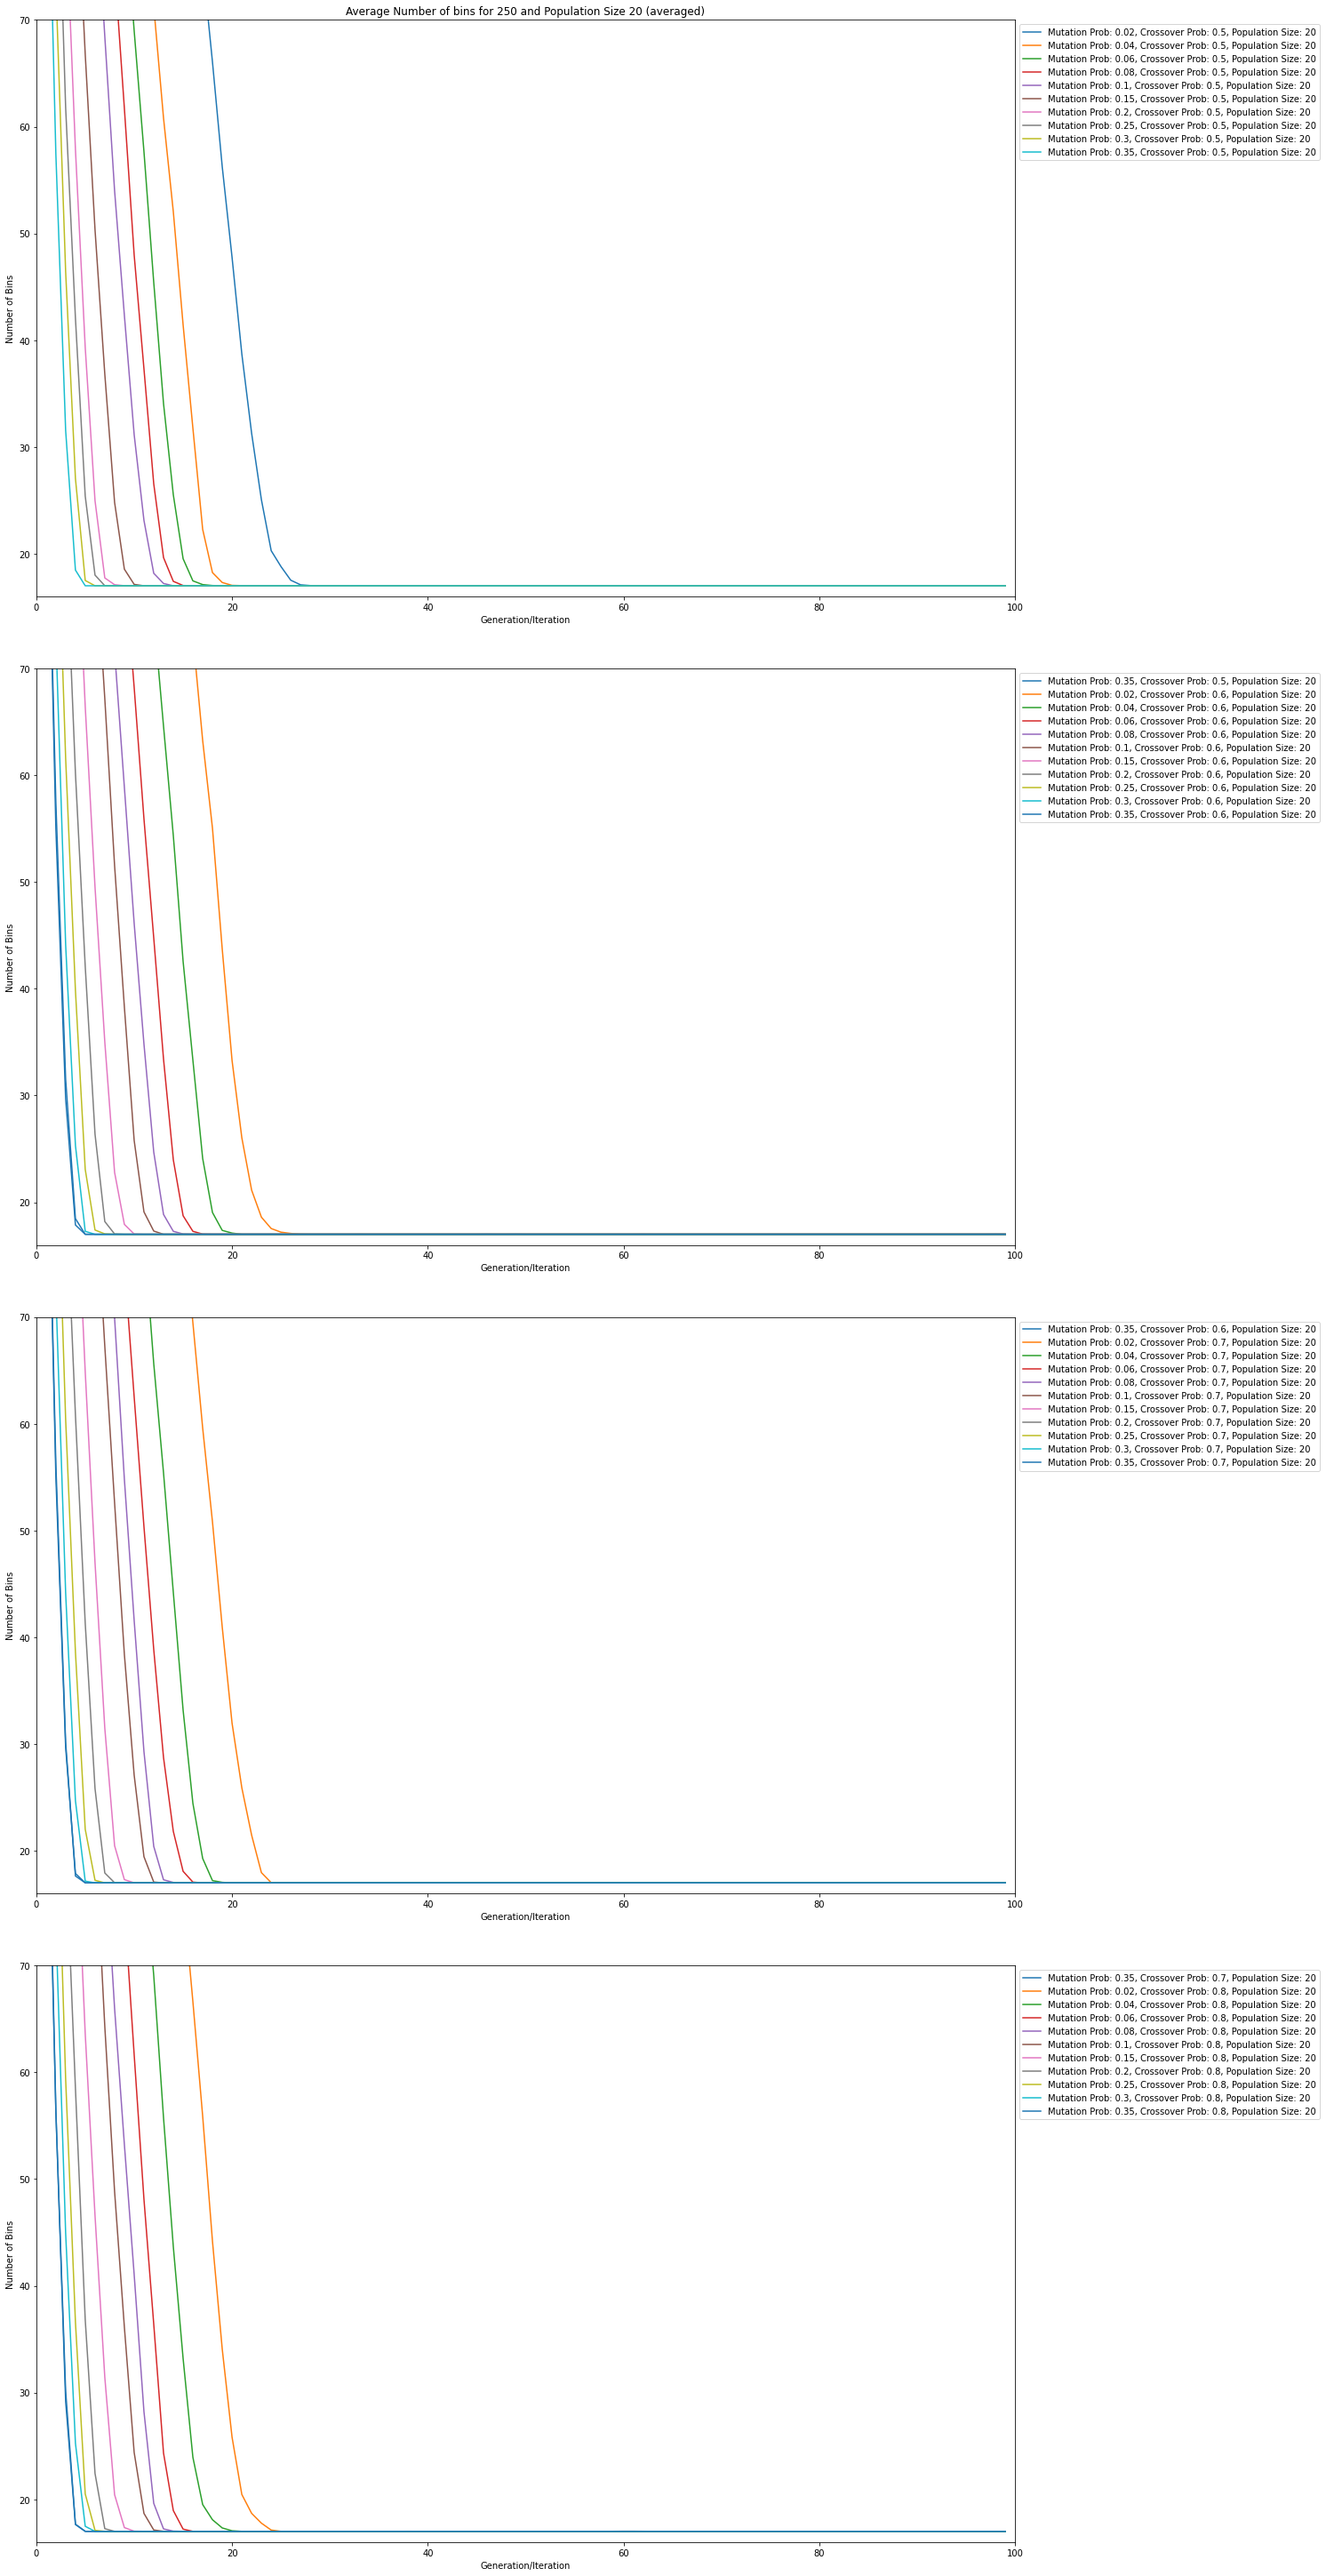

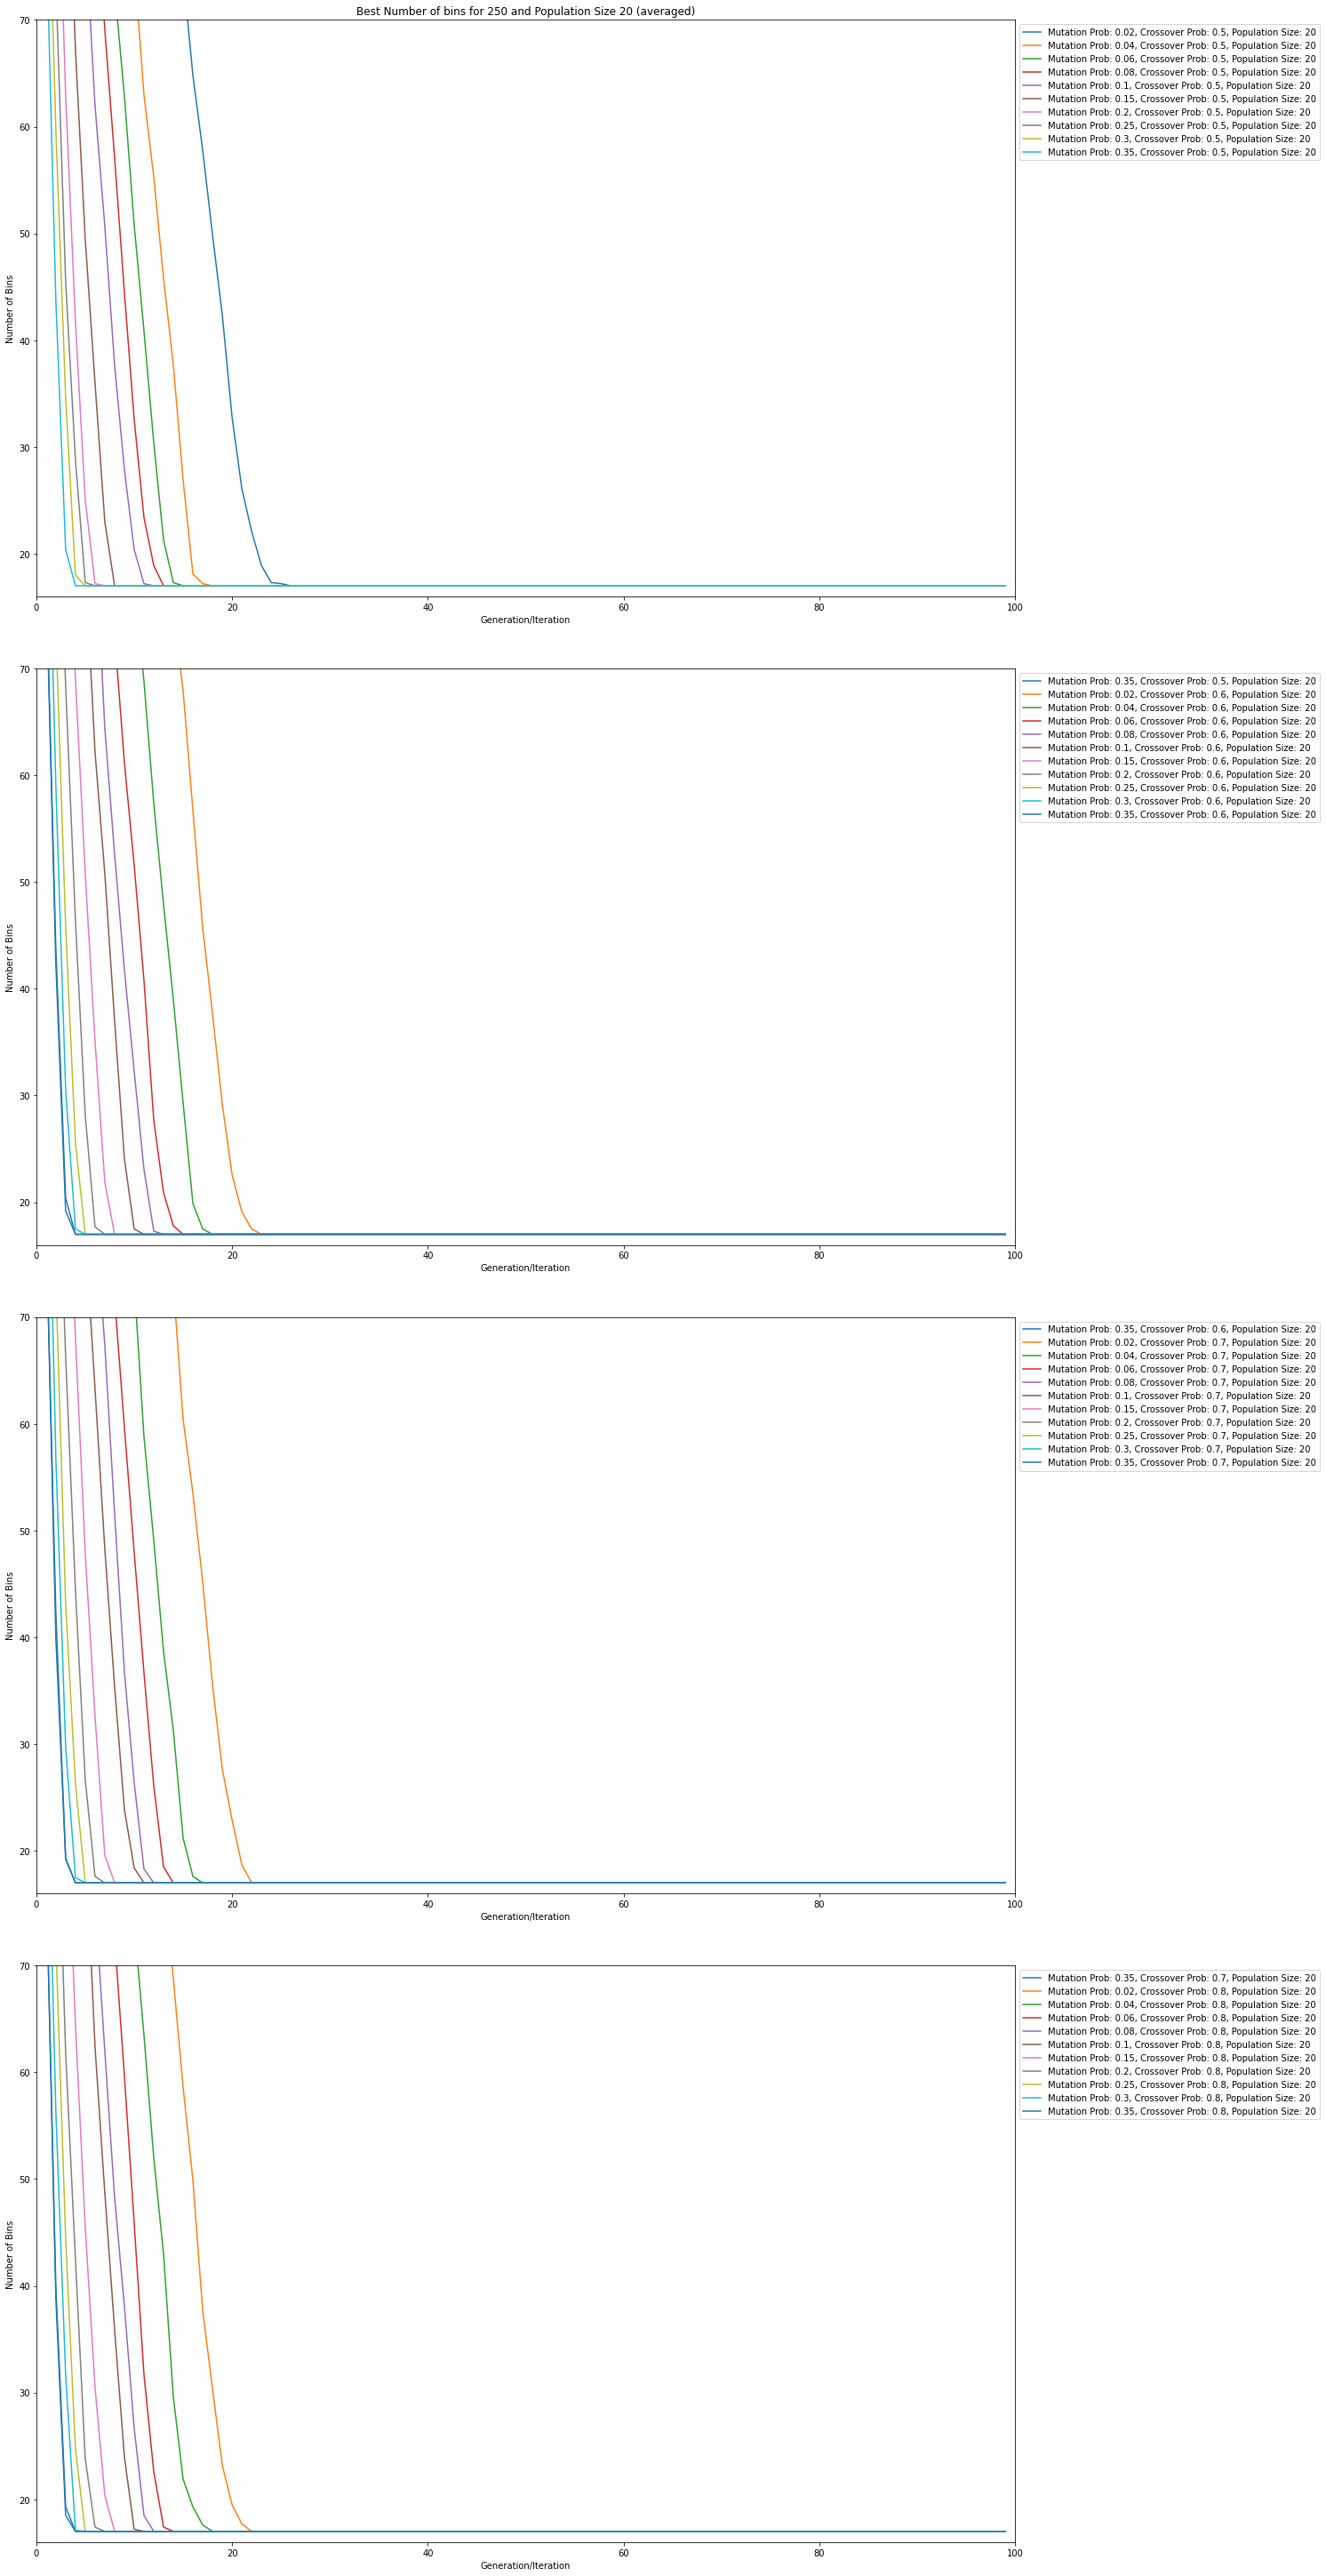

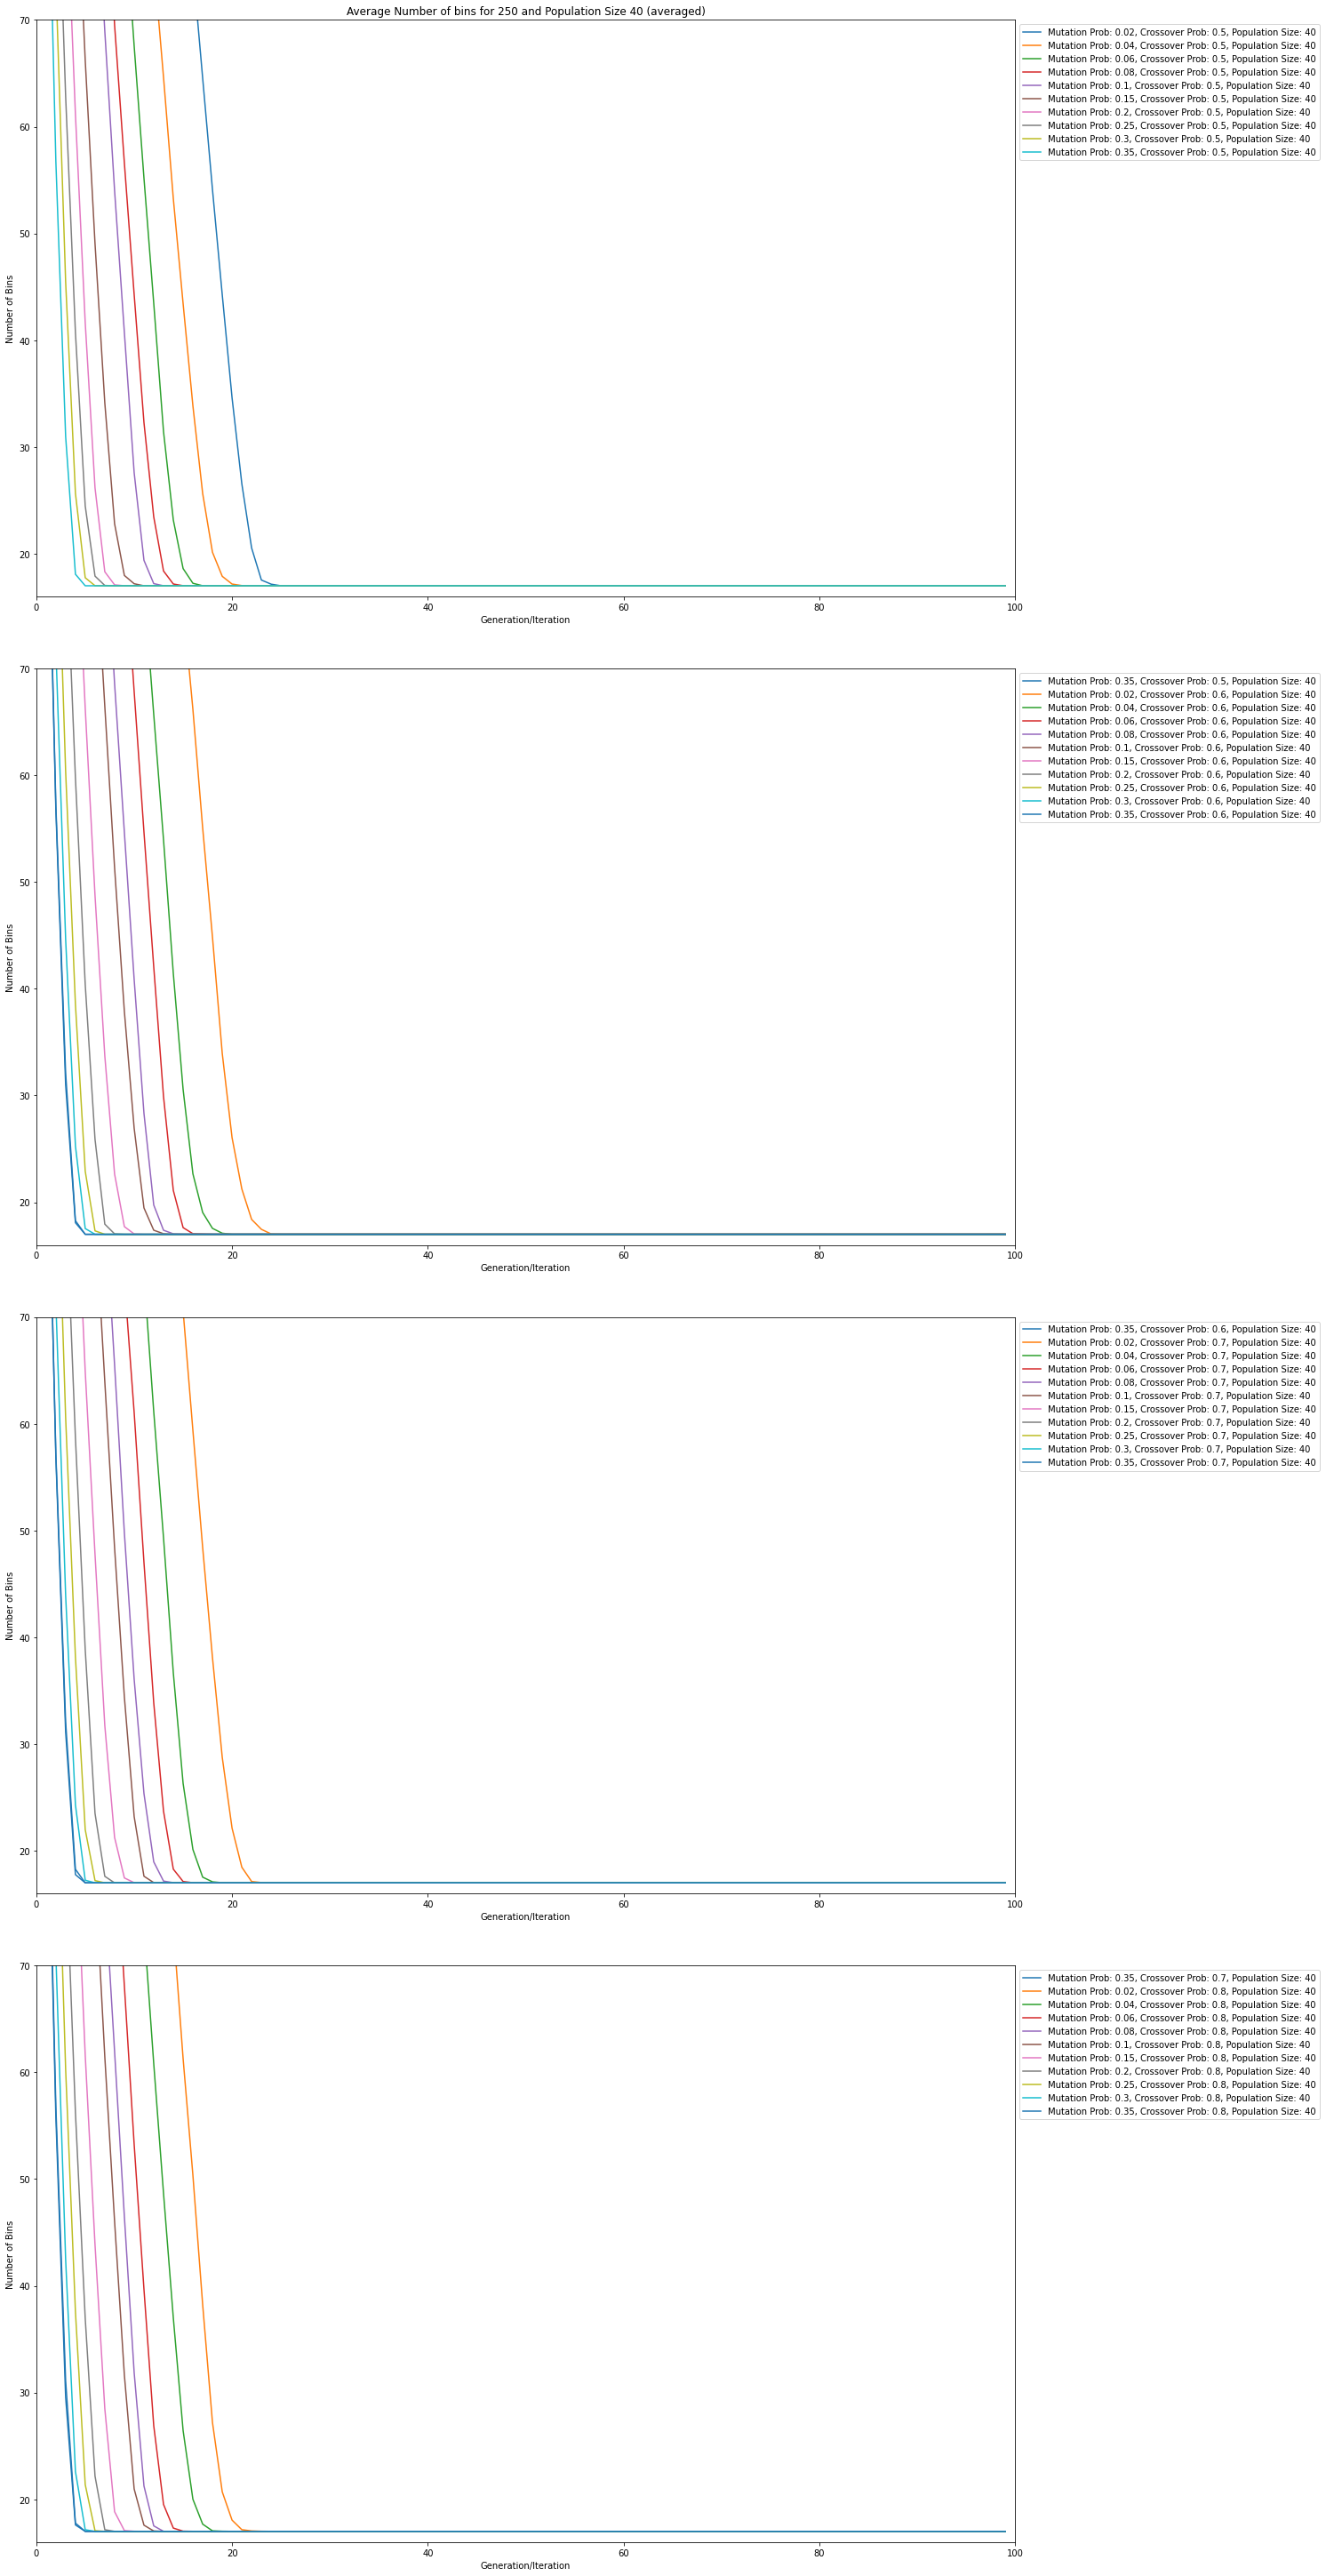

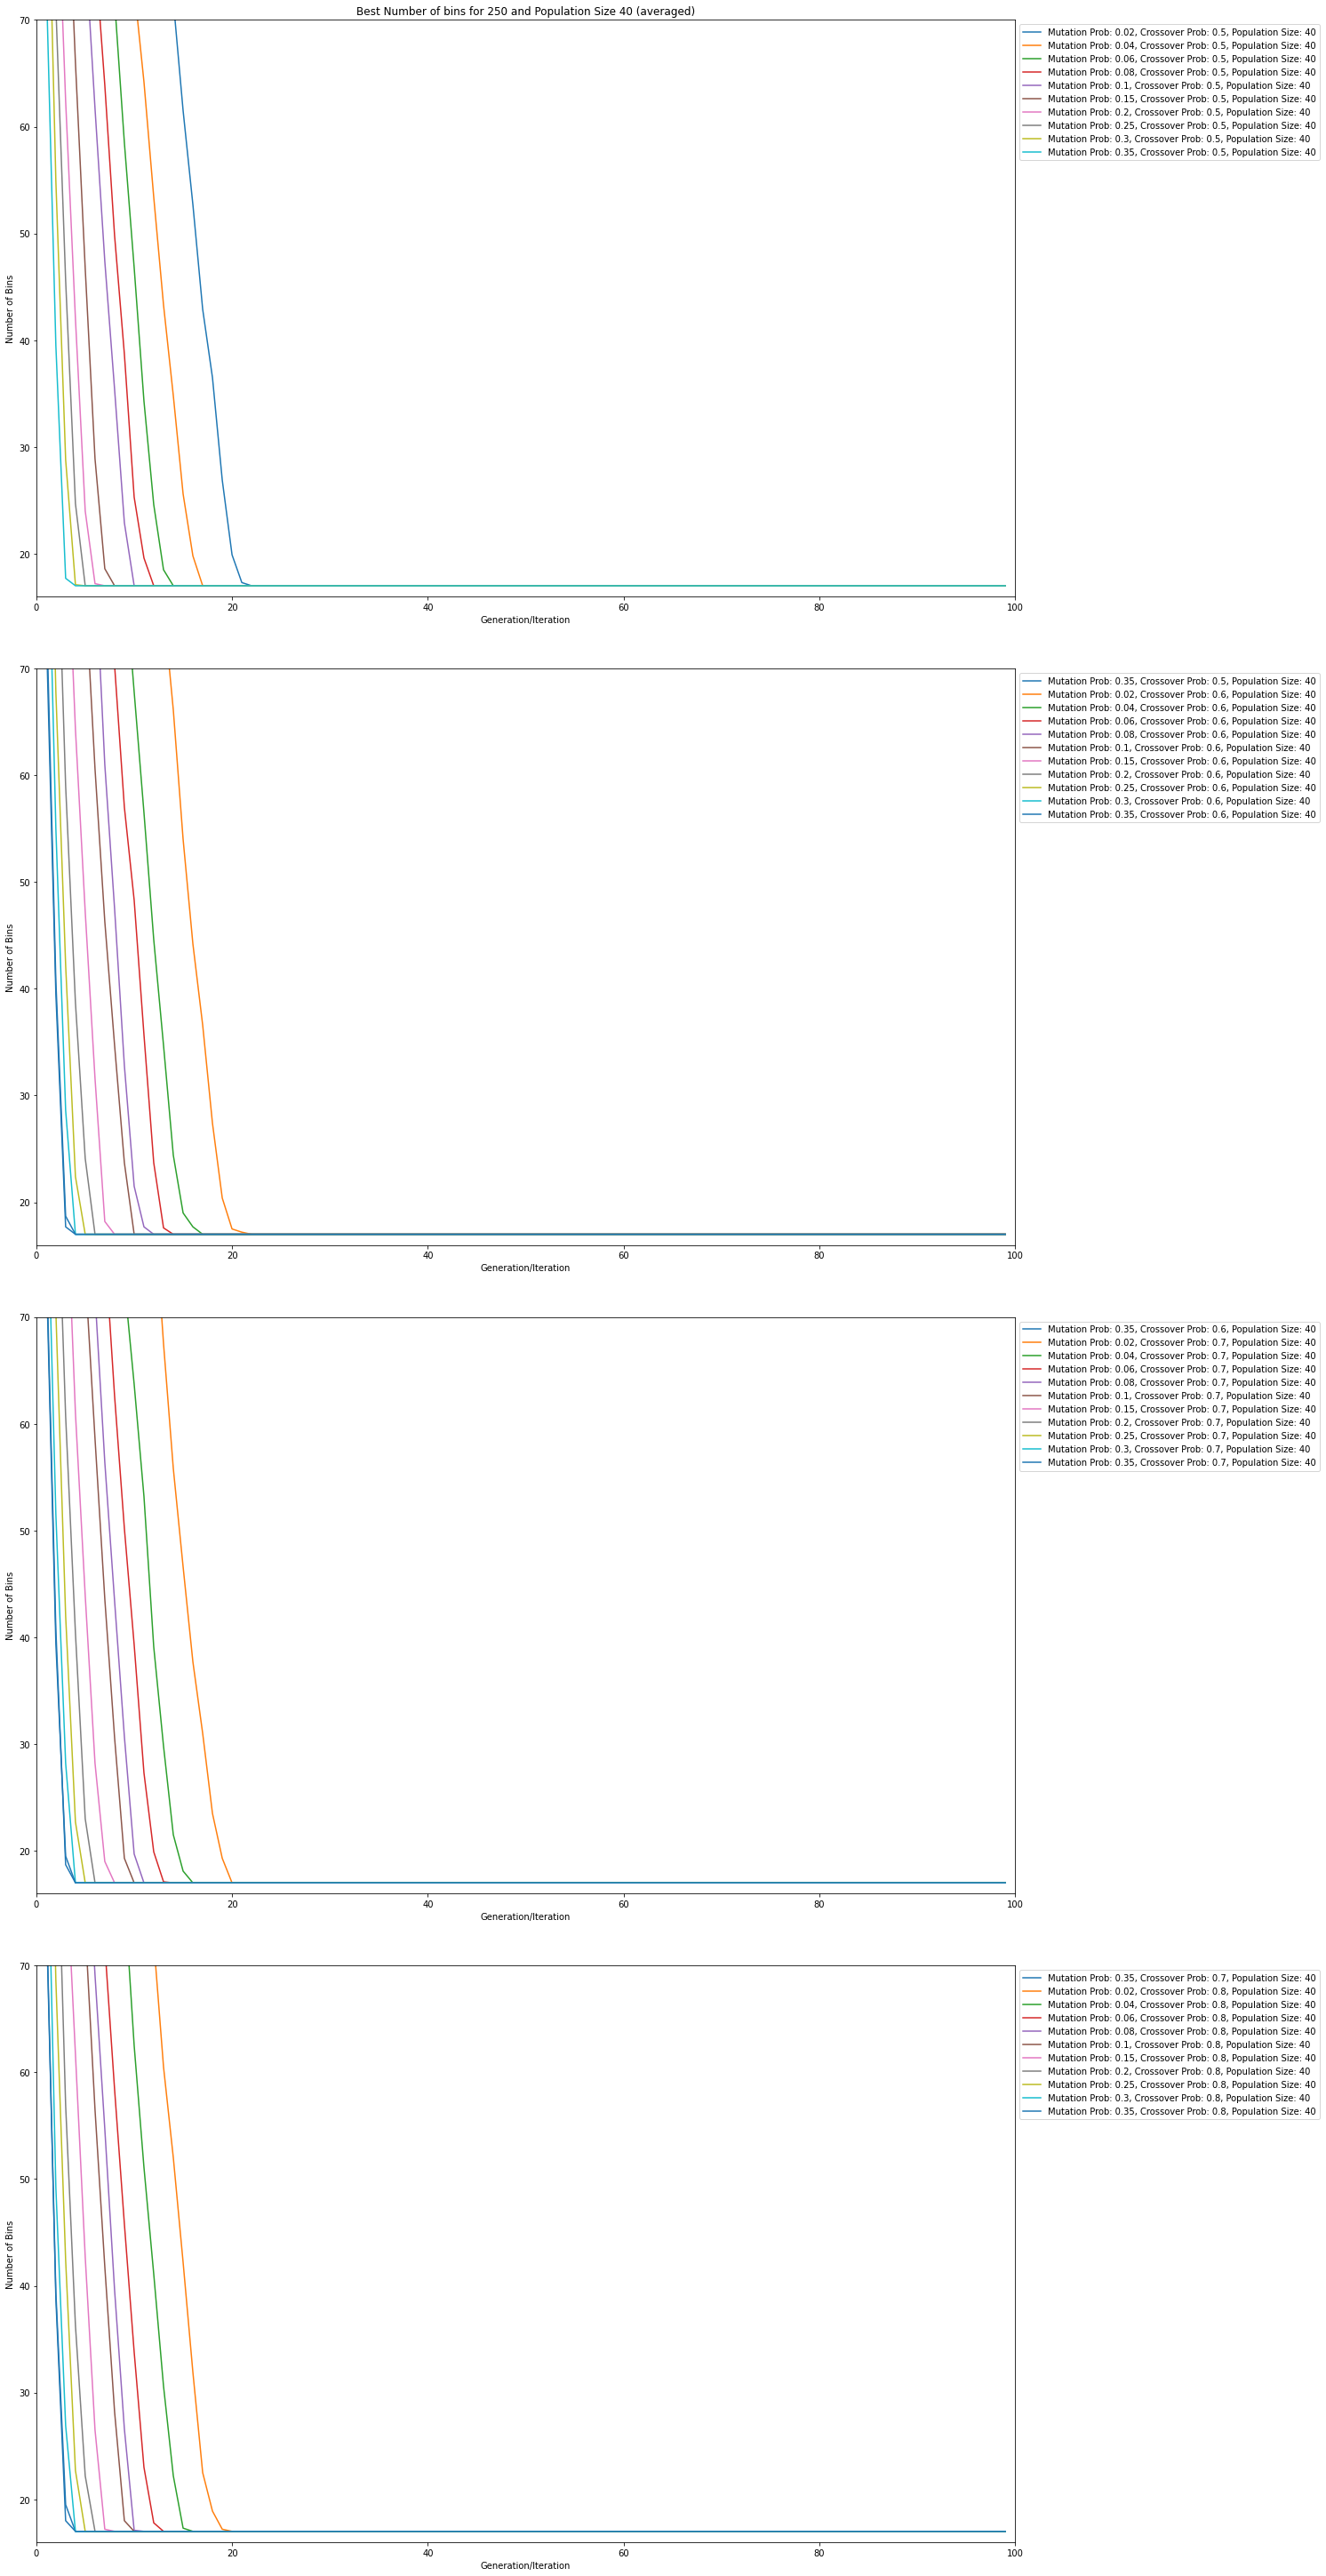

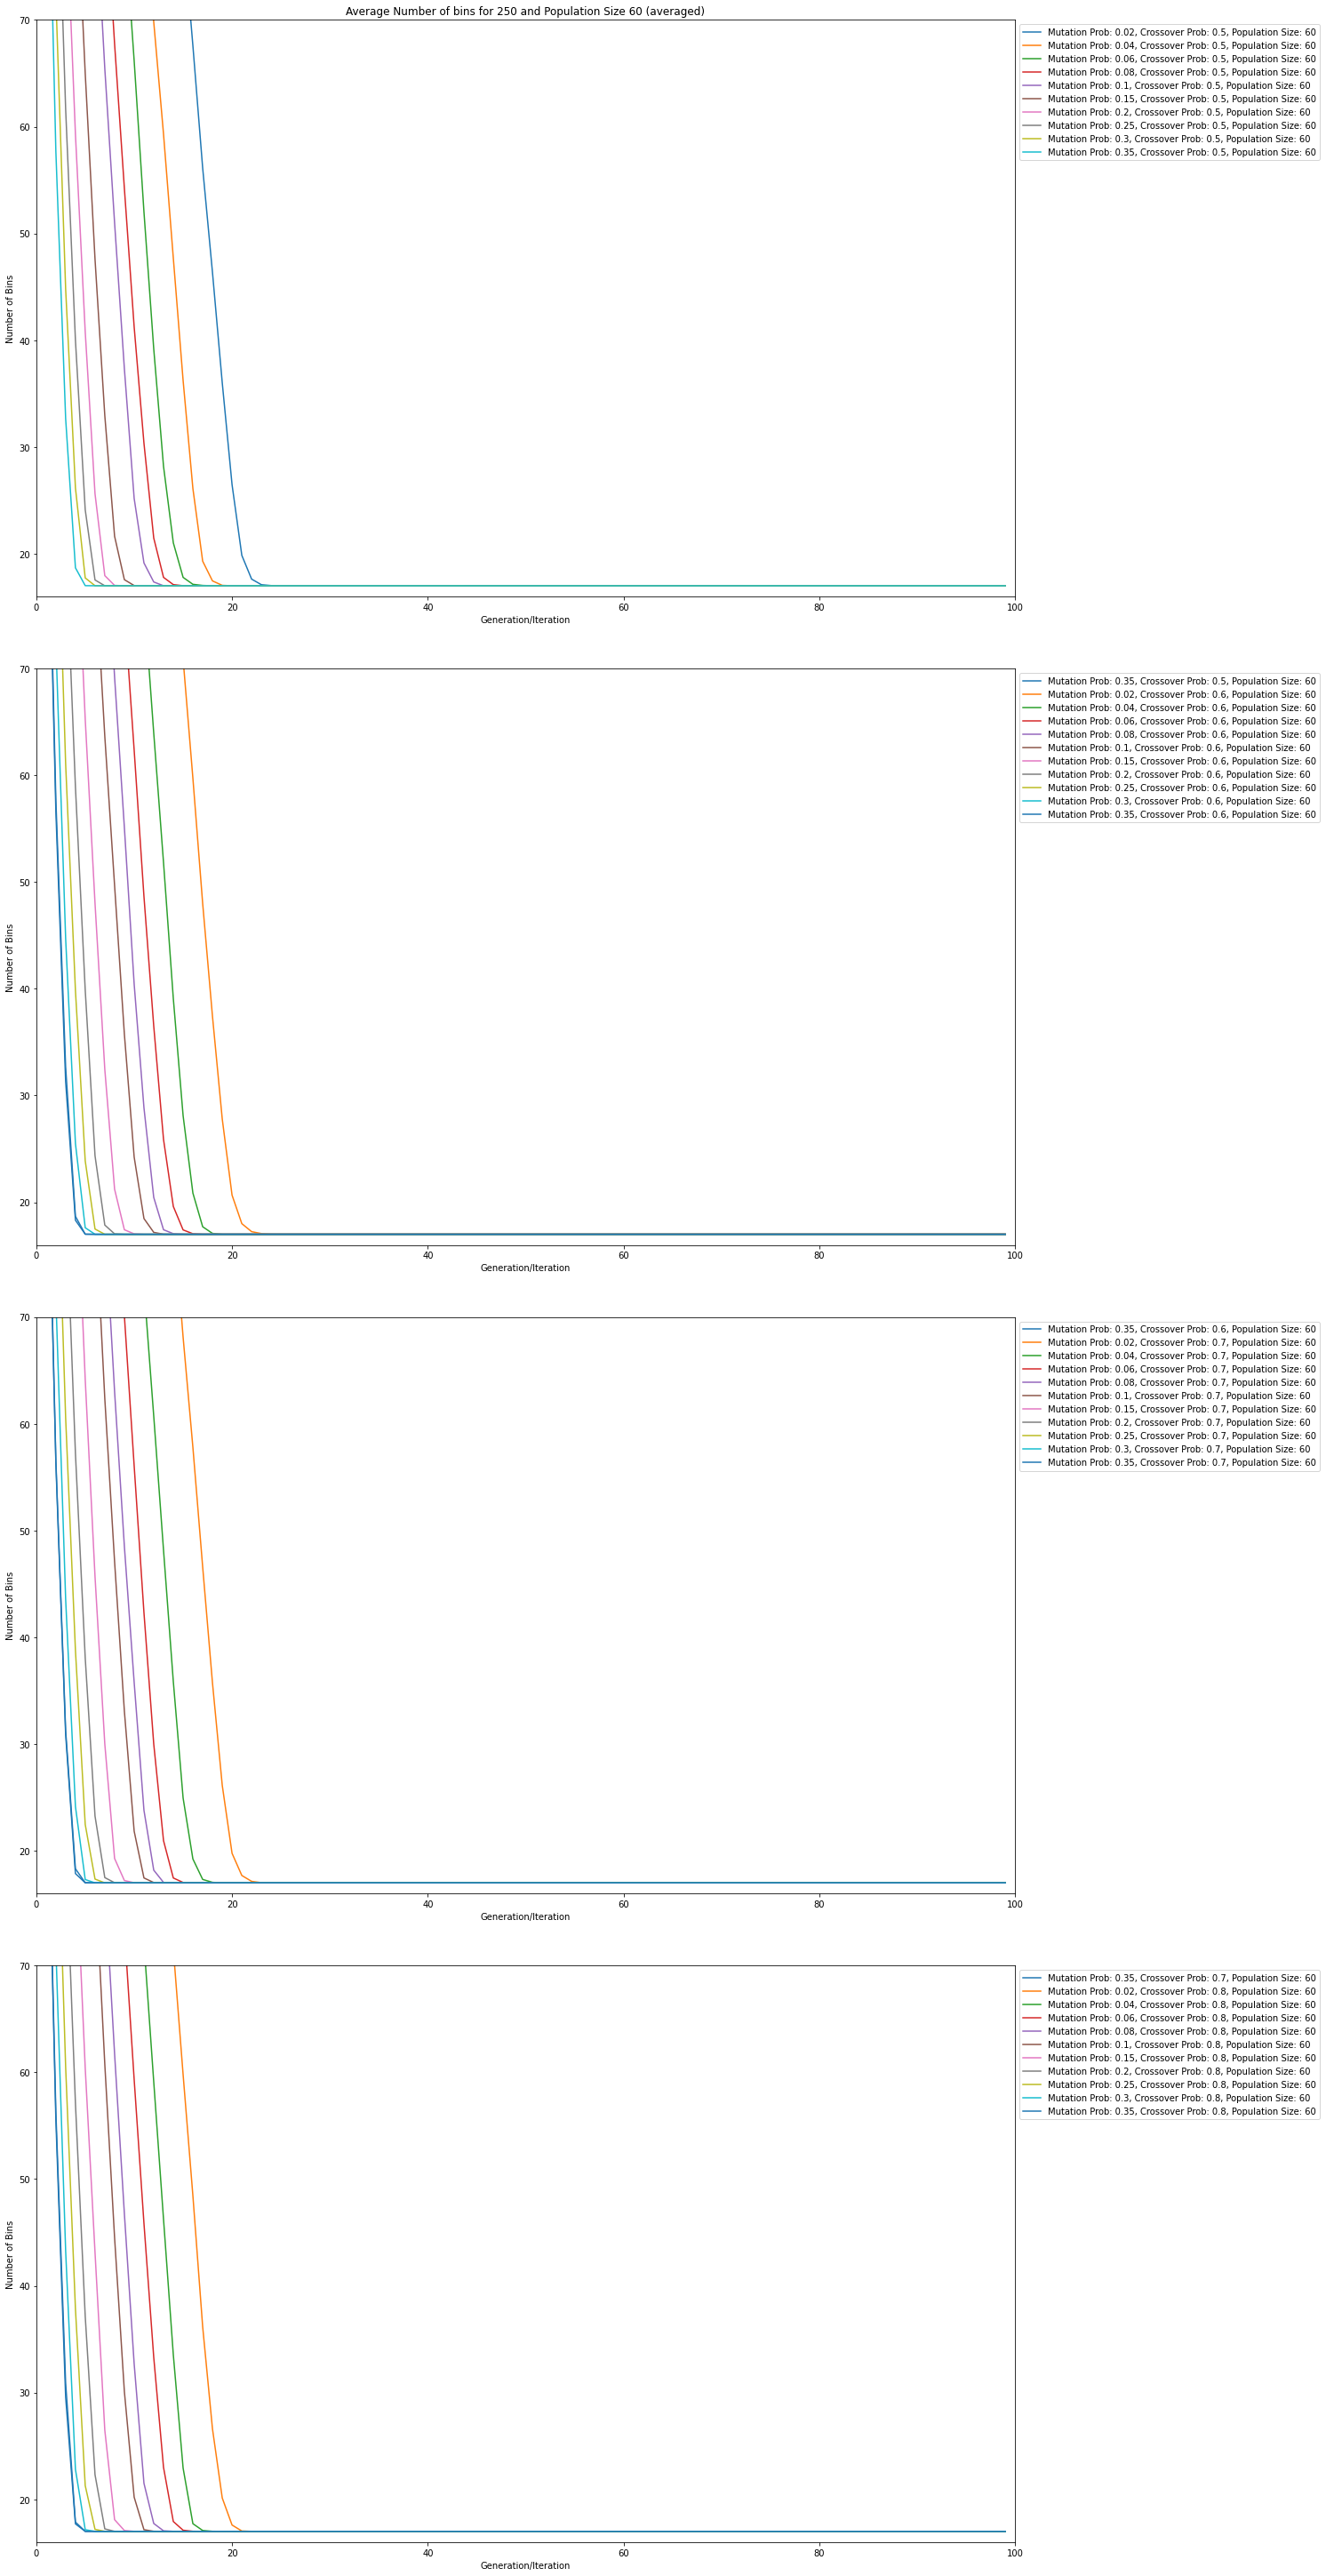

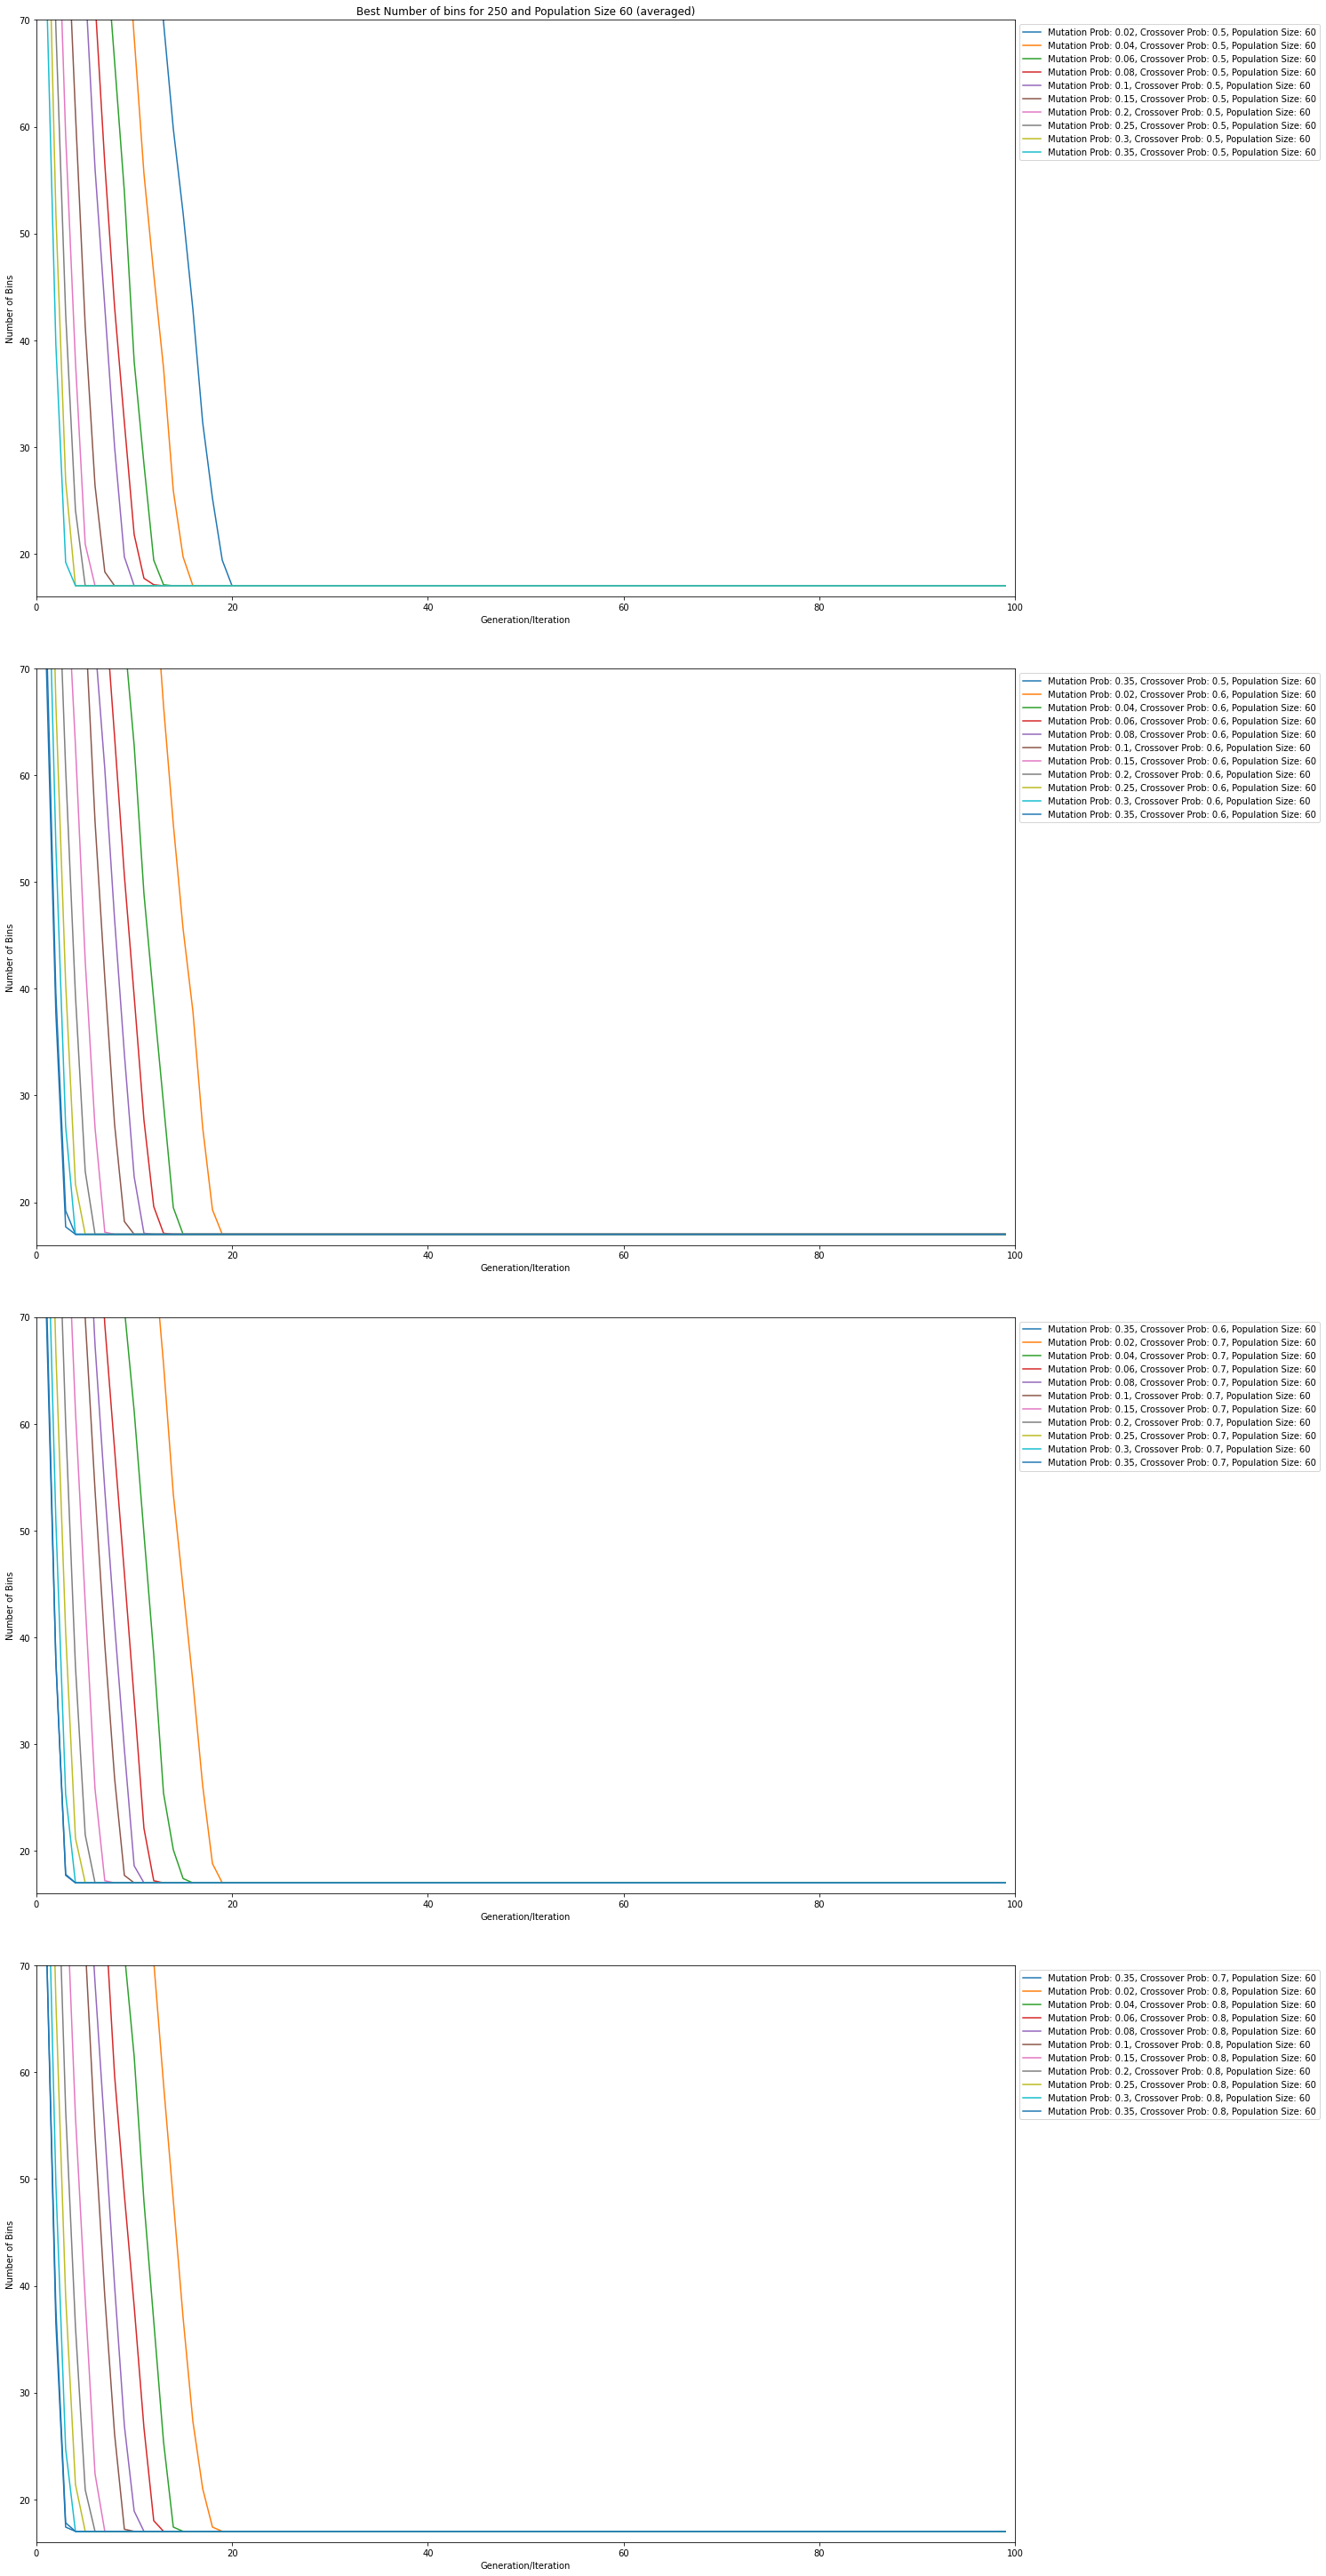

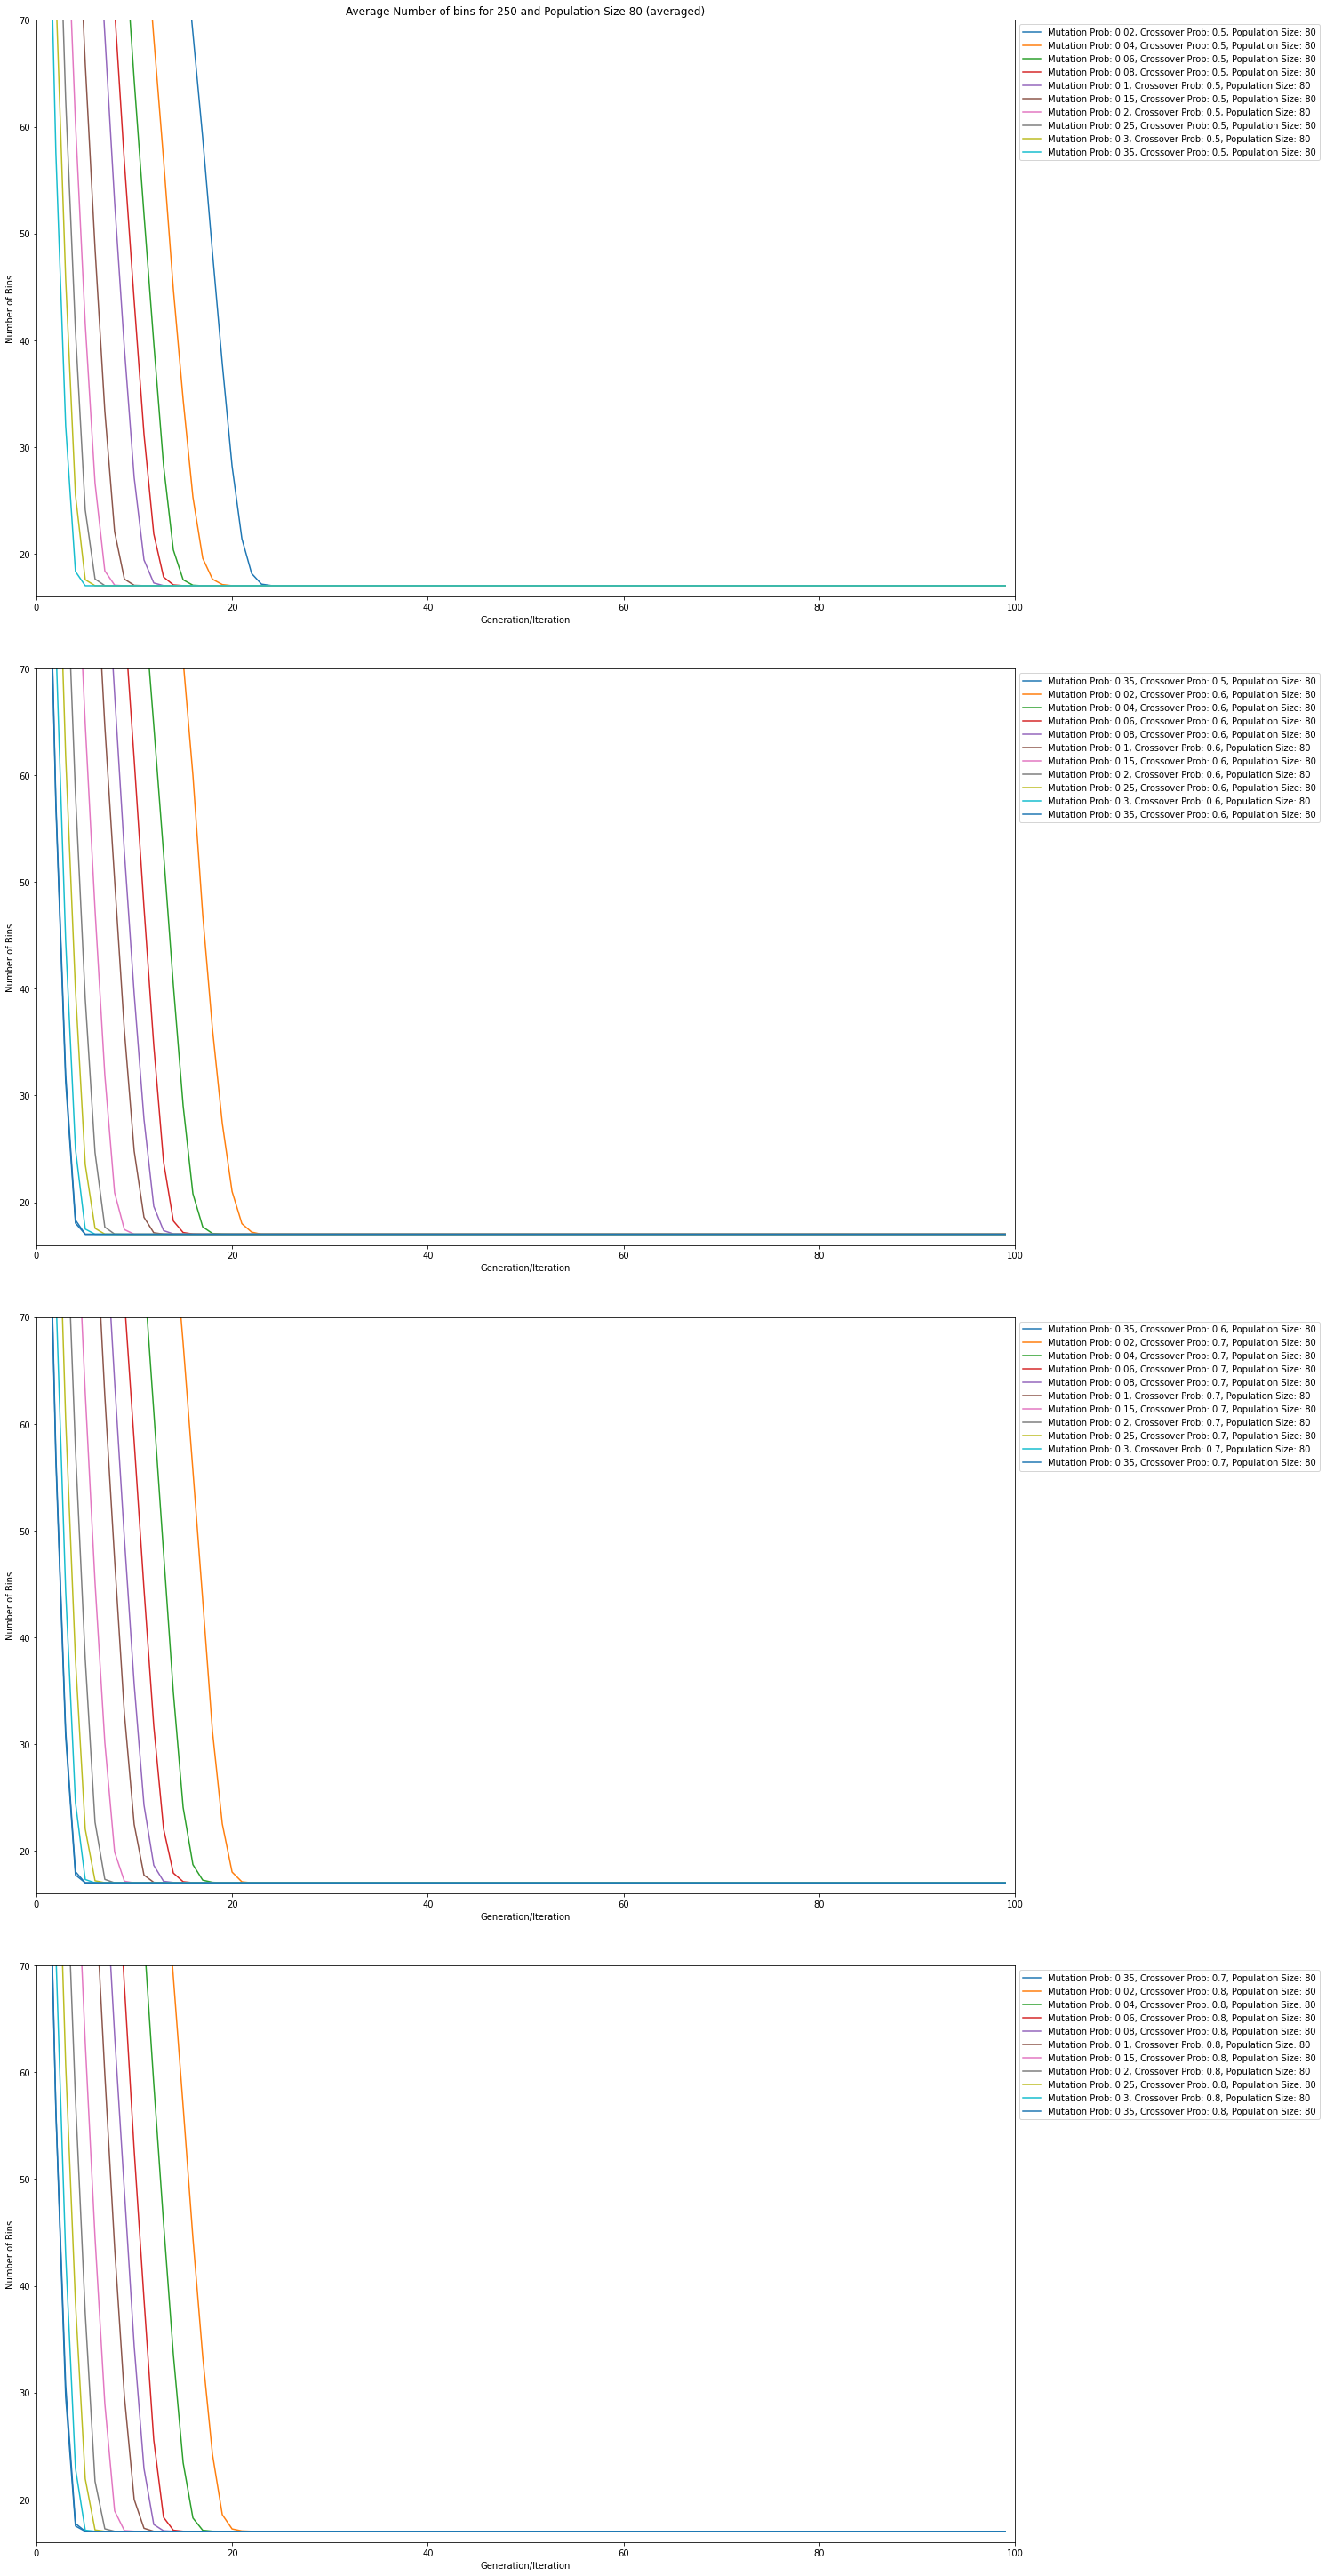

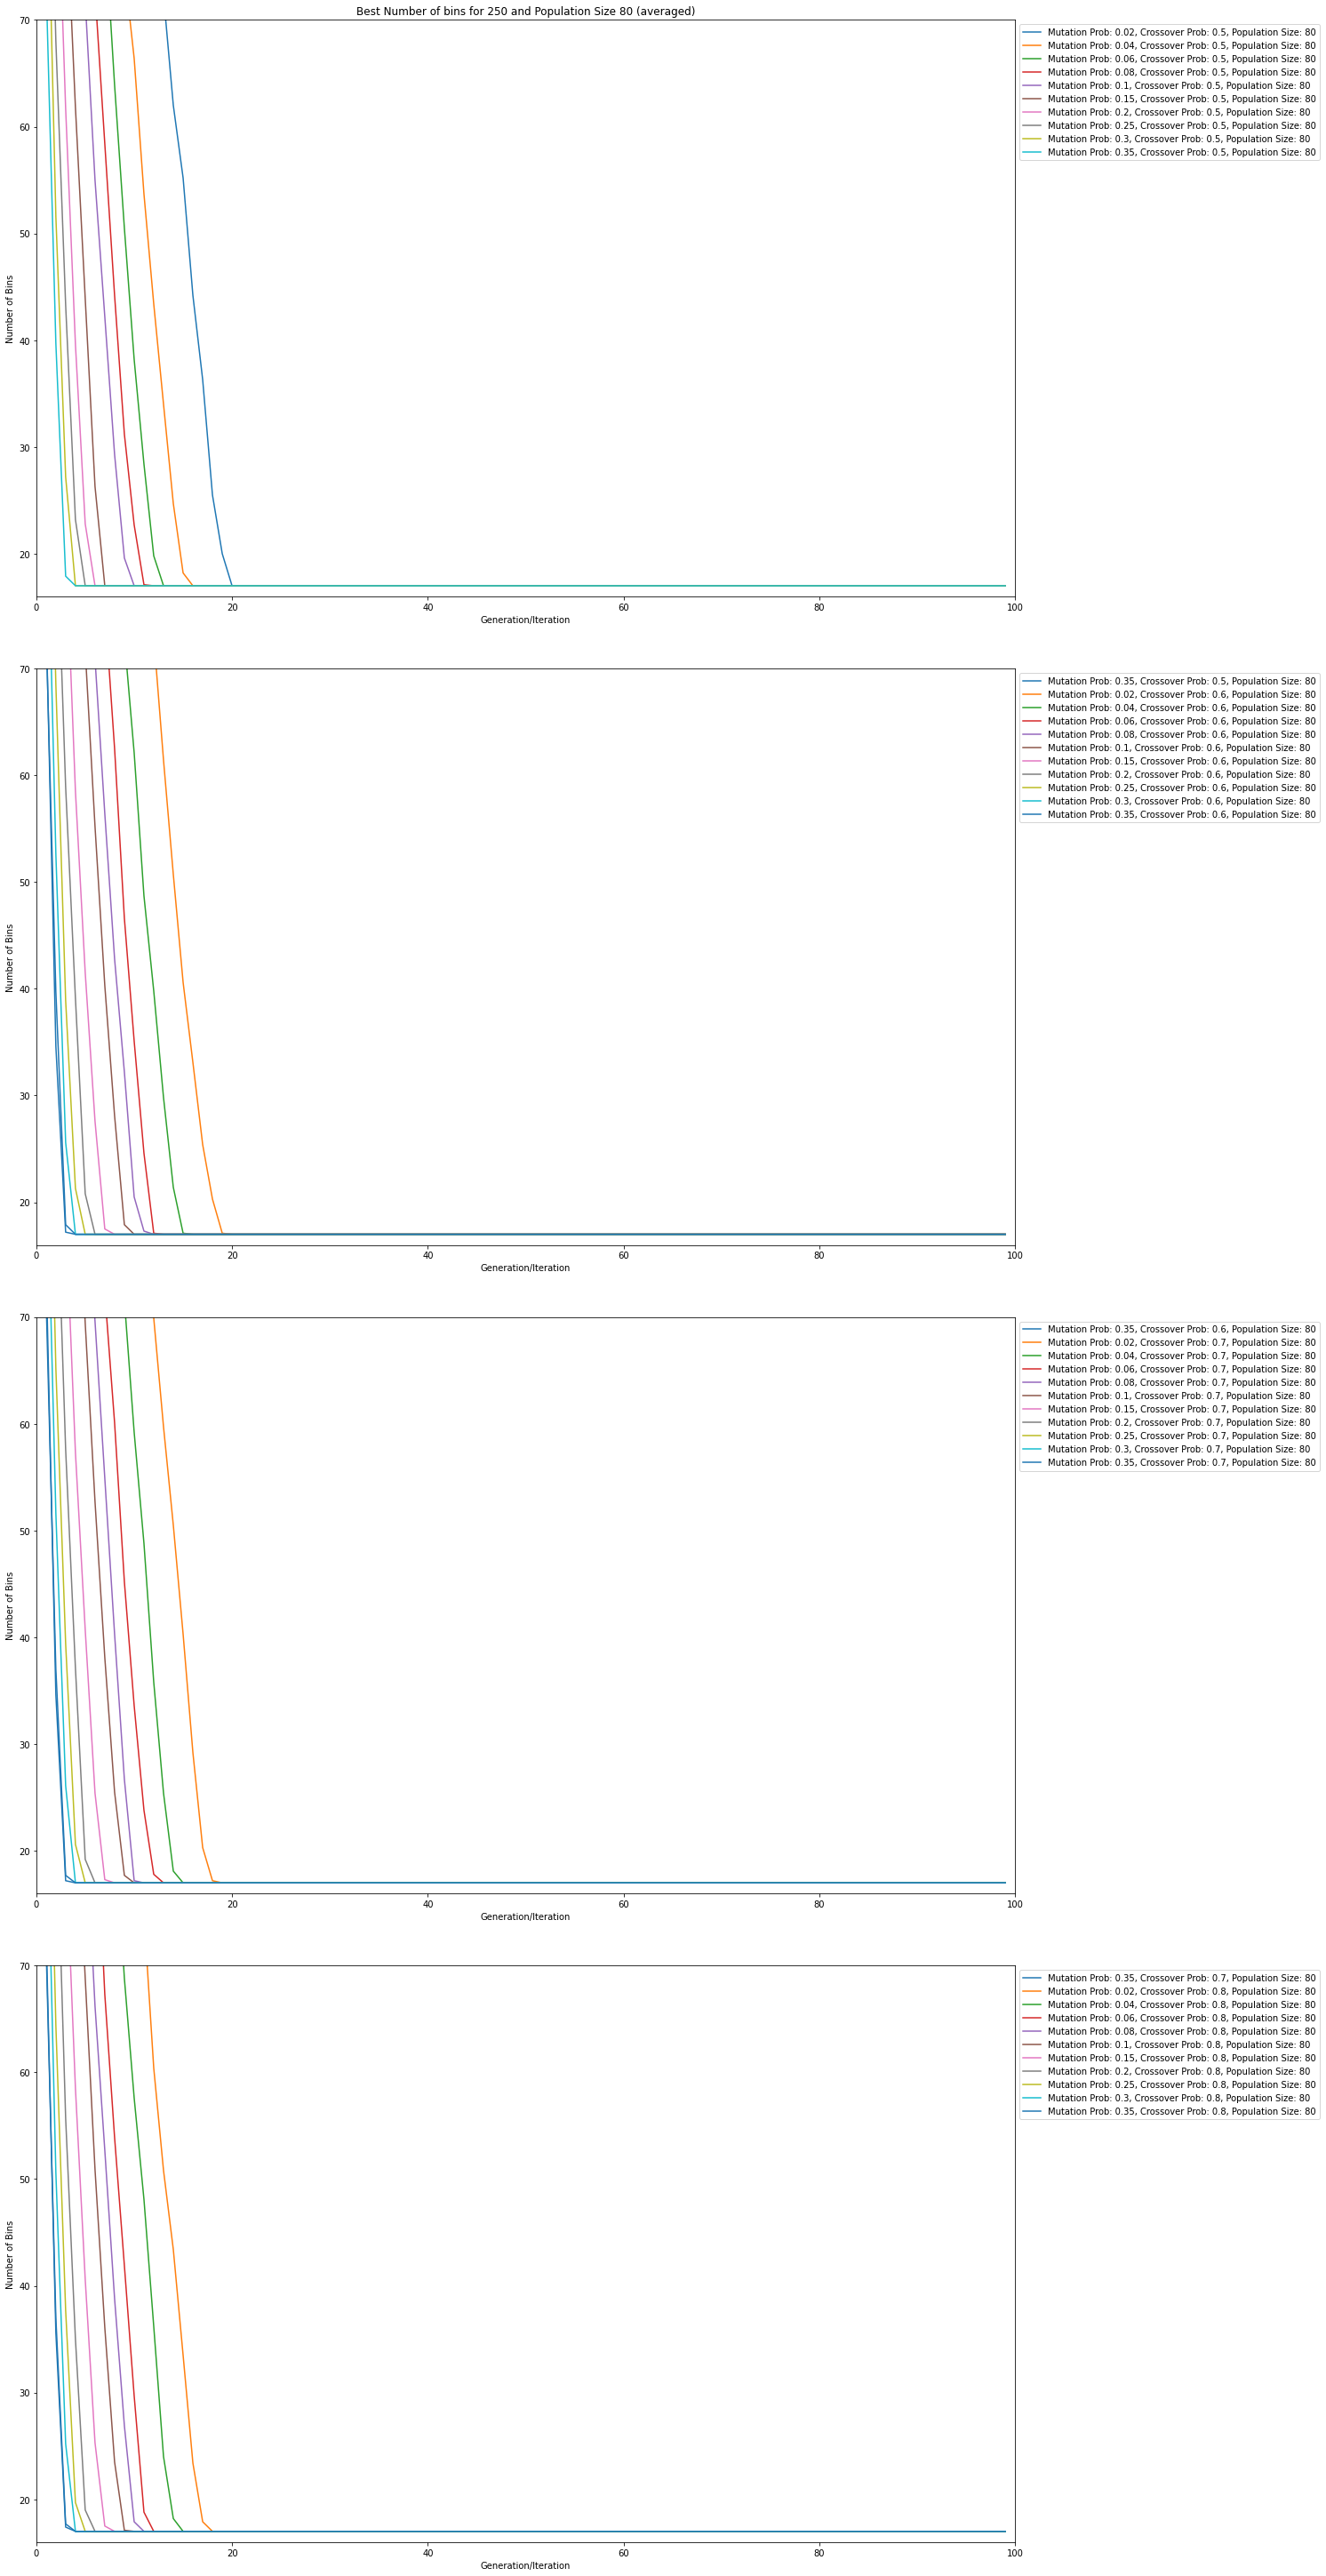

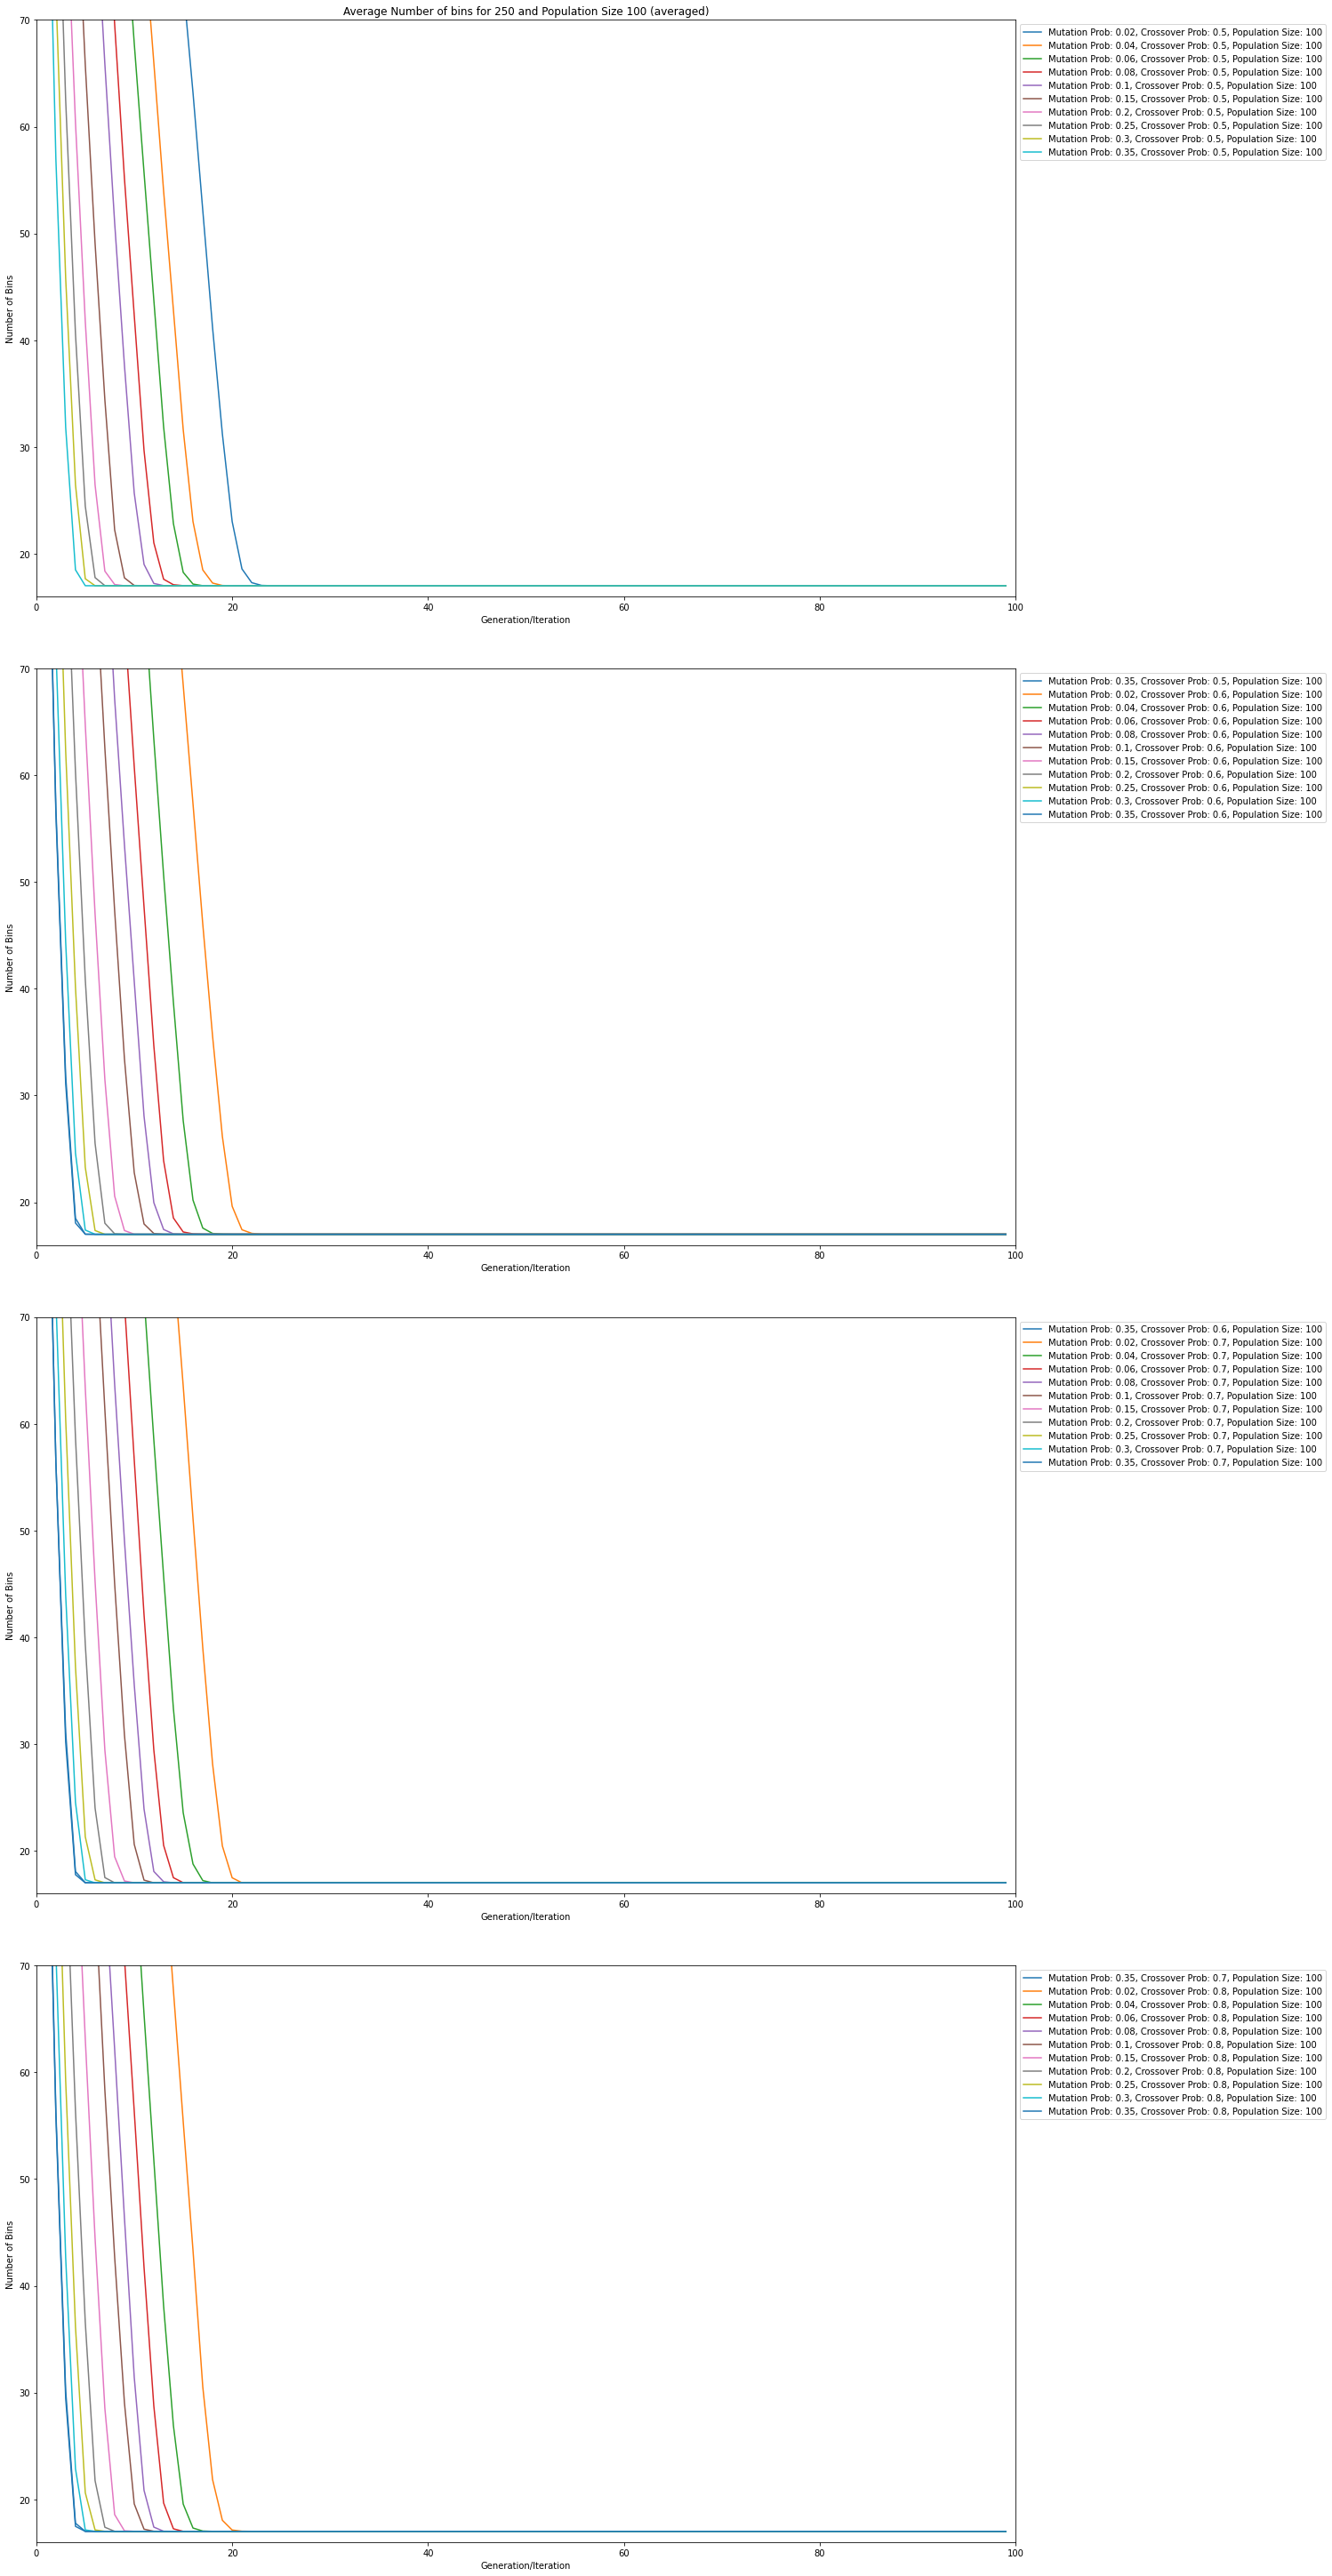

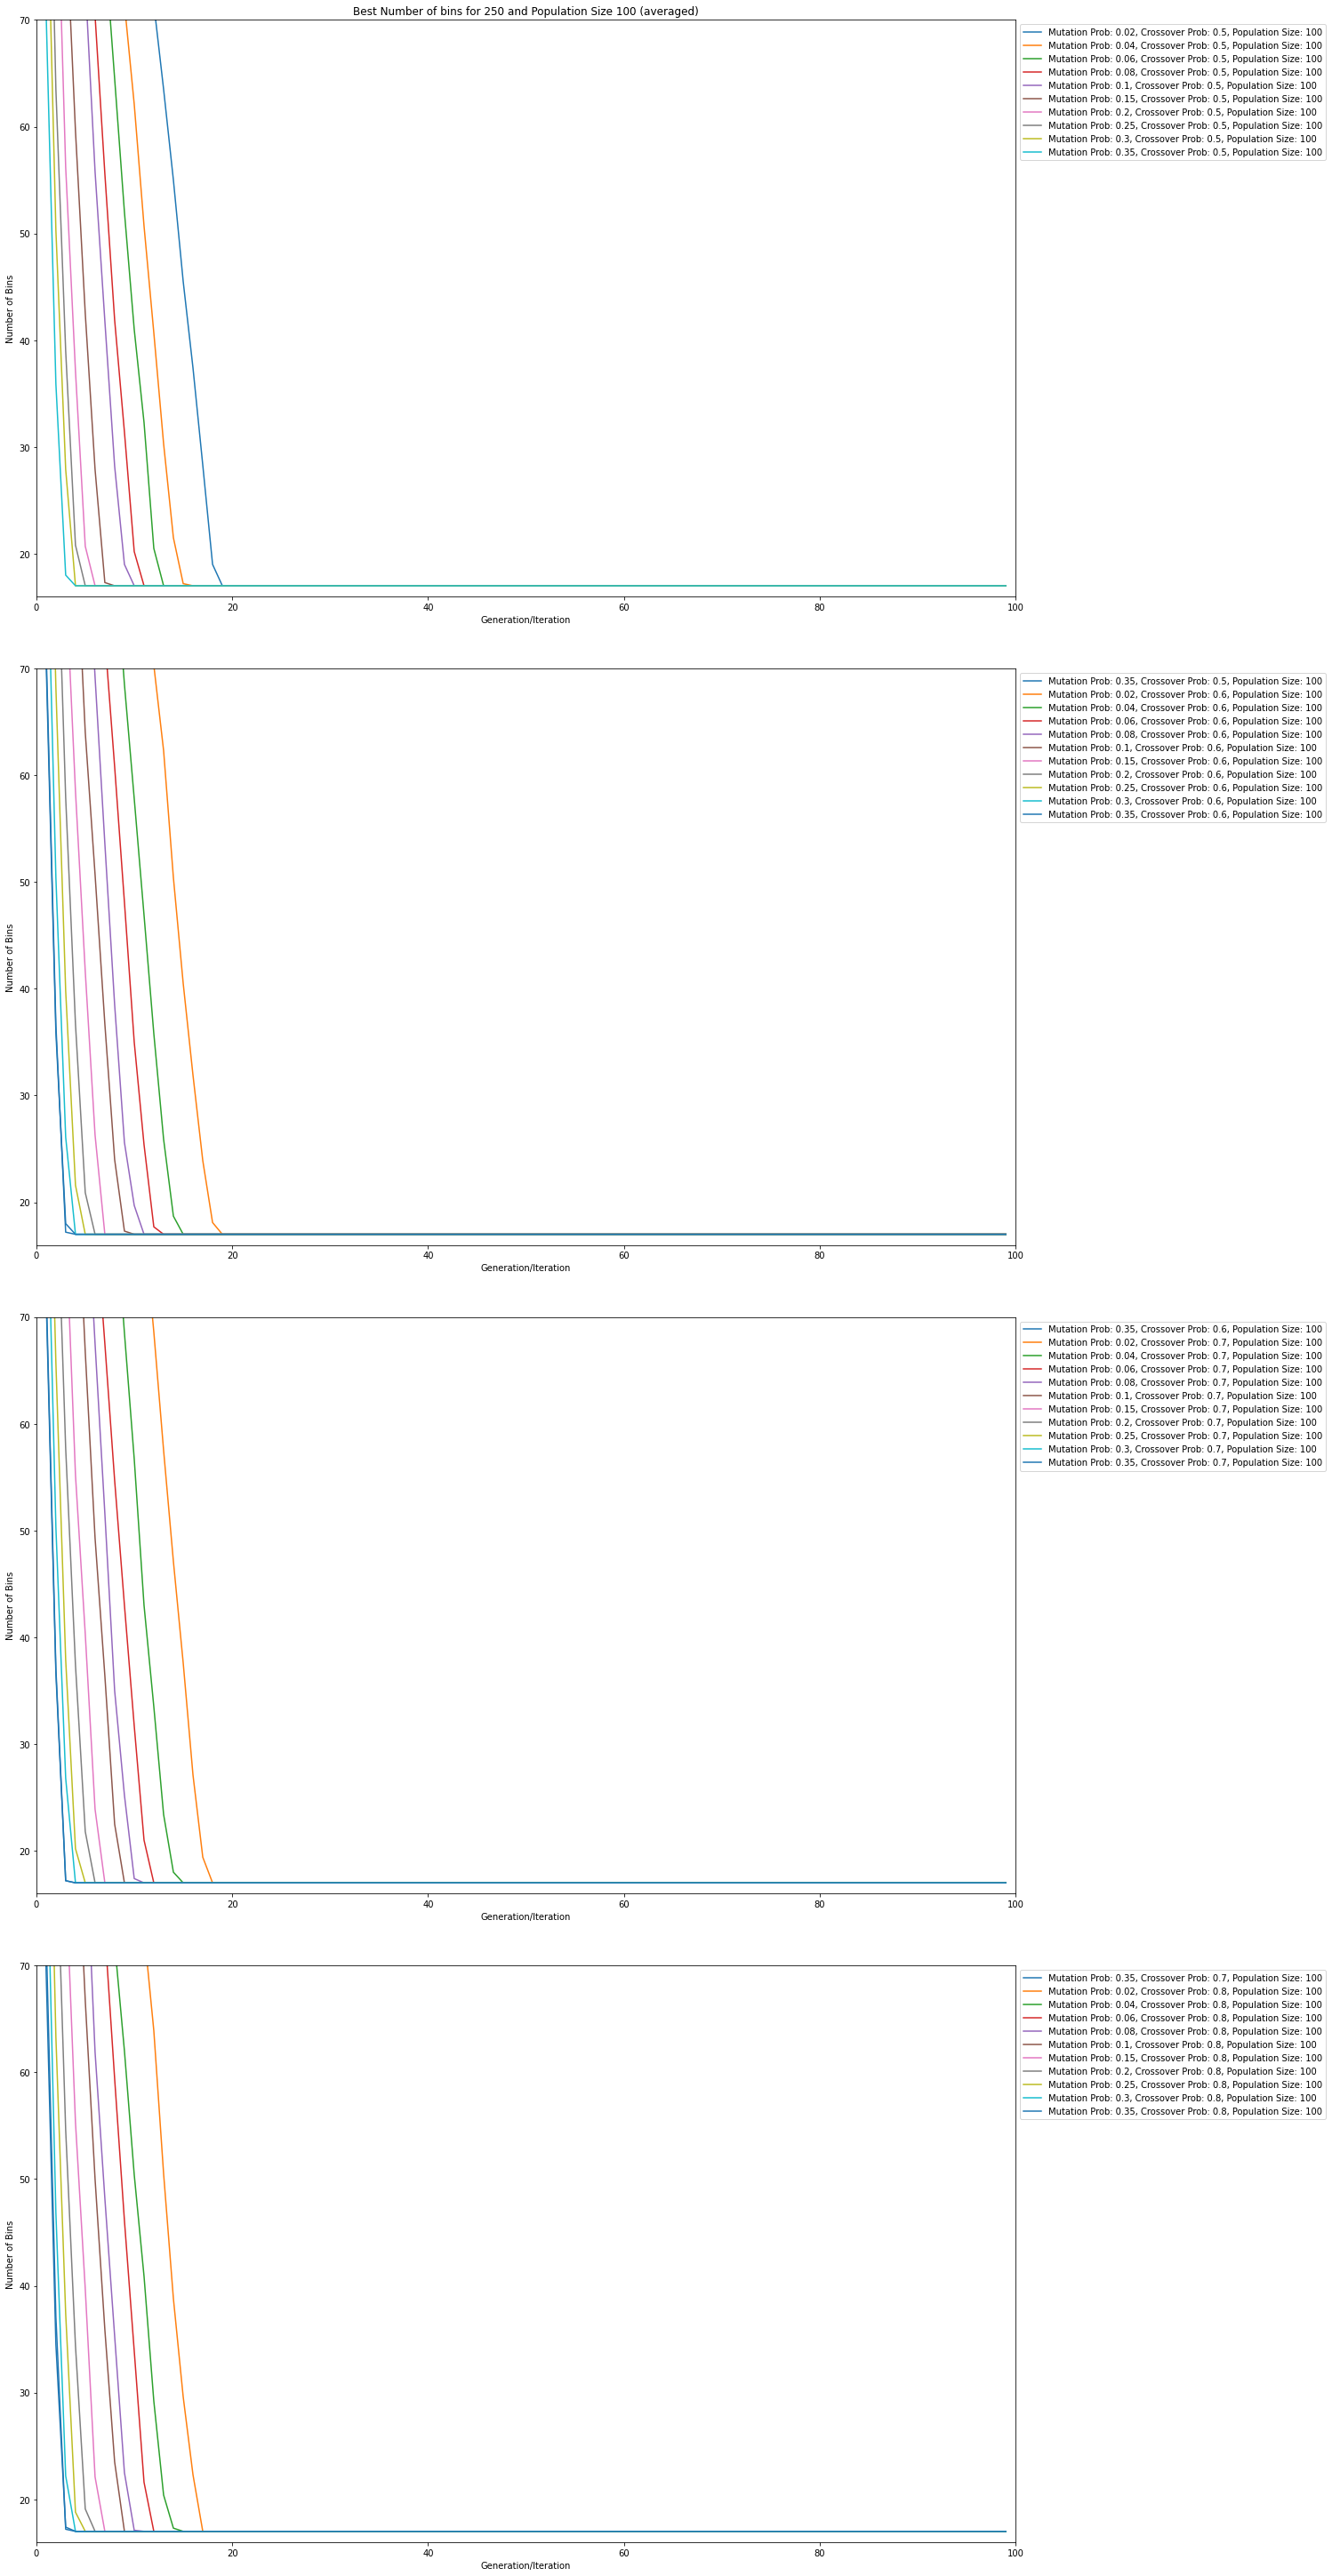

In [7]:
plot_grid_search(medium_objects, medium_container, medium_optimal_solution, [0,60], [10,60])

# Large Problem 

KeyboardInterrupt: 

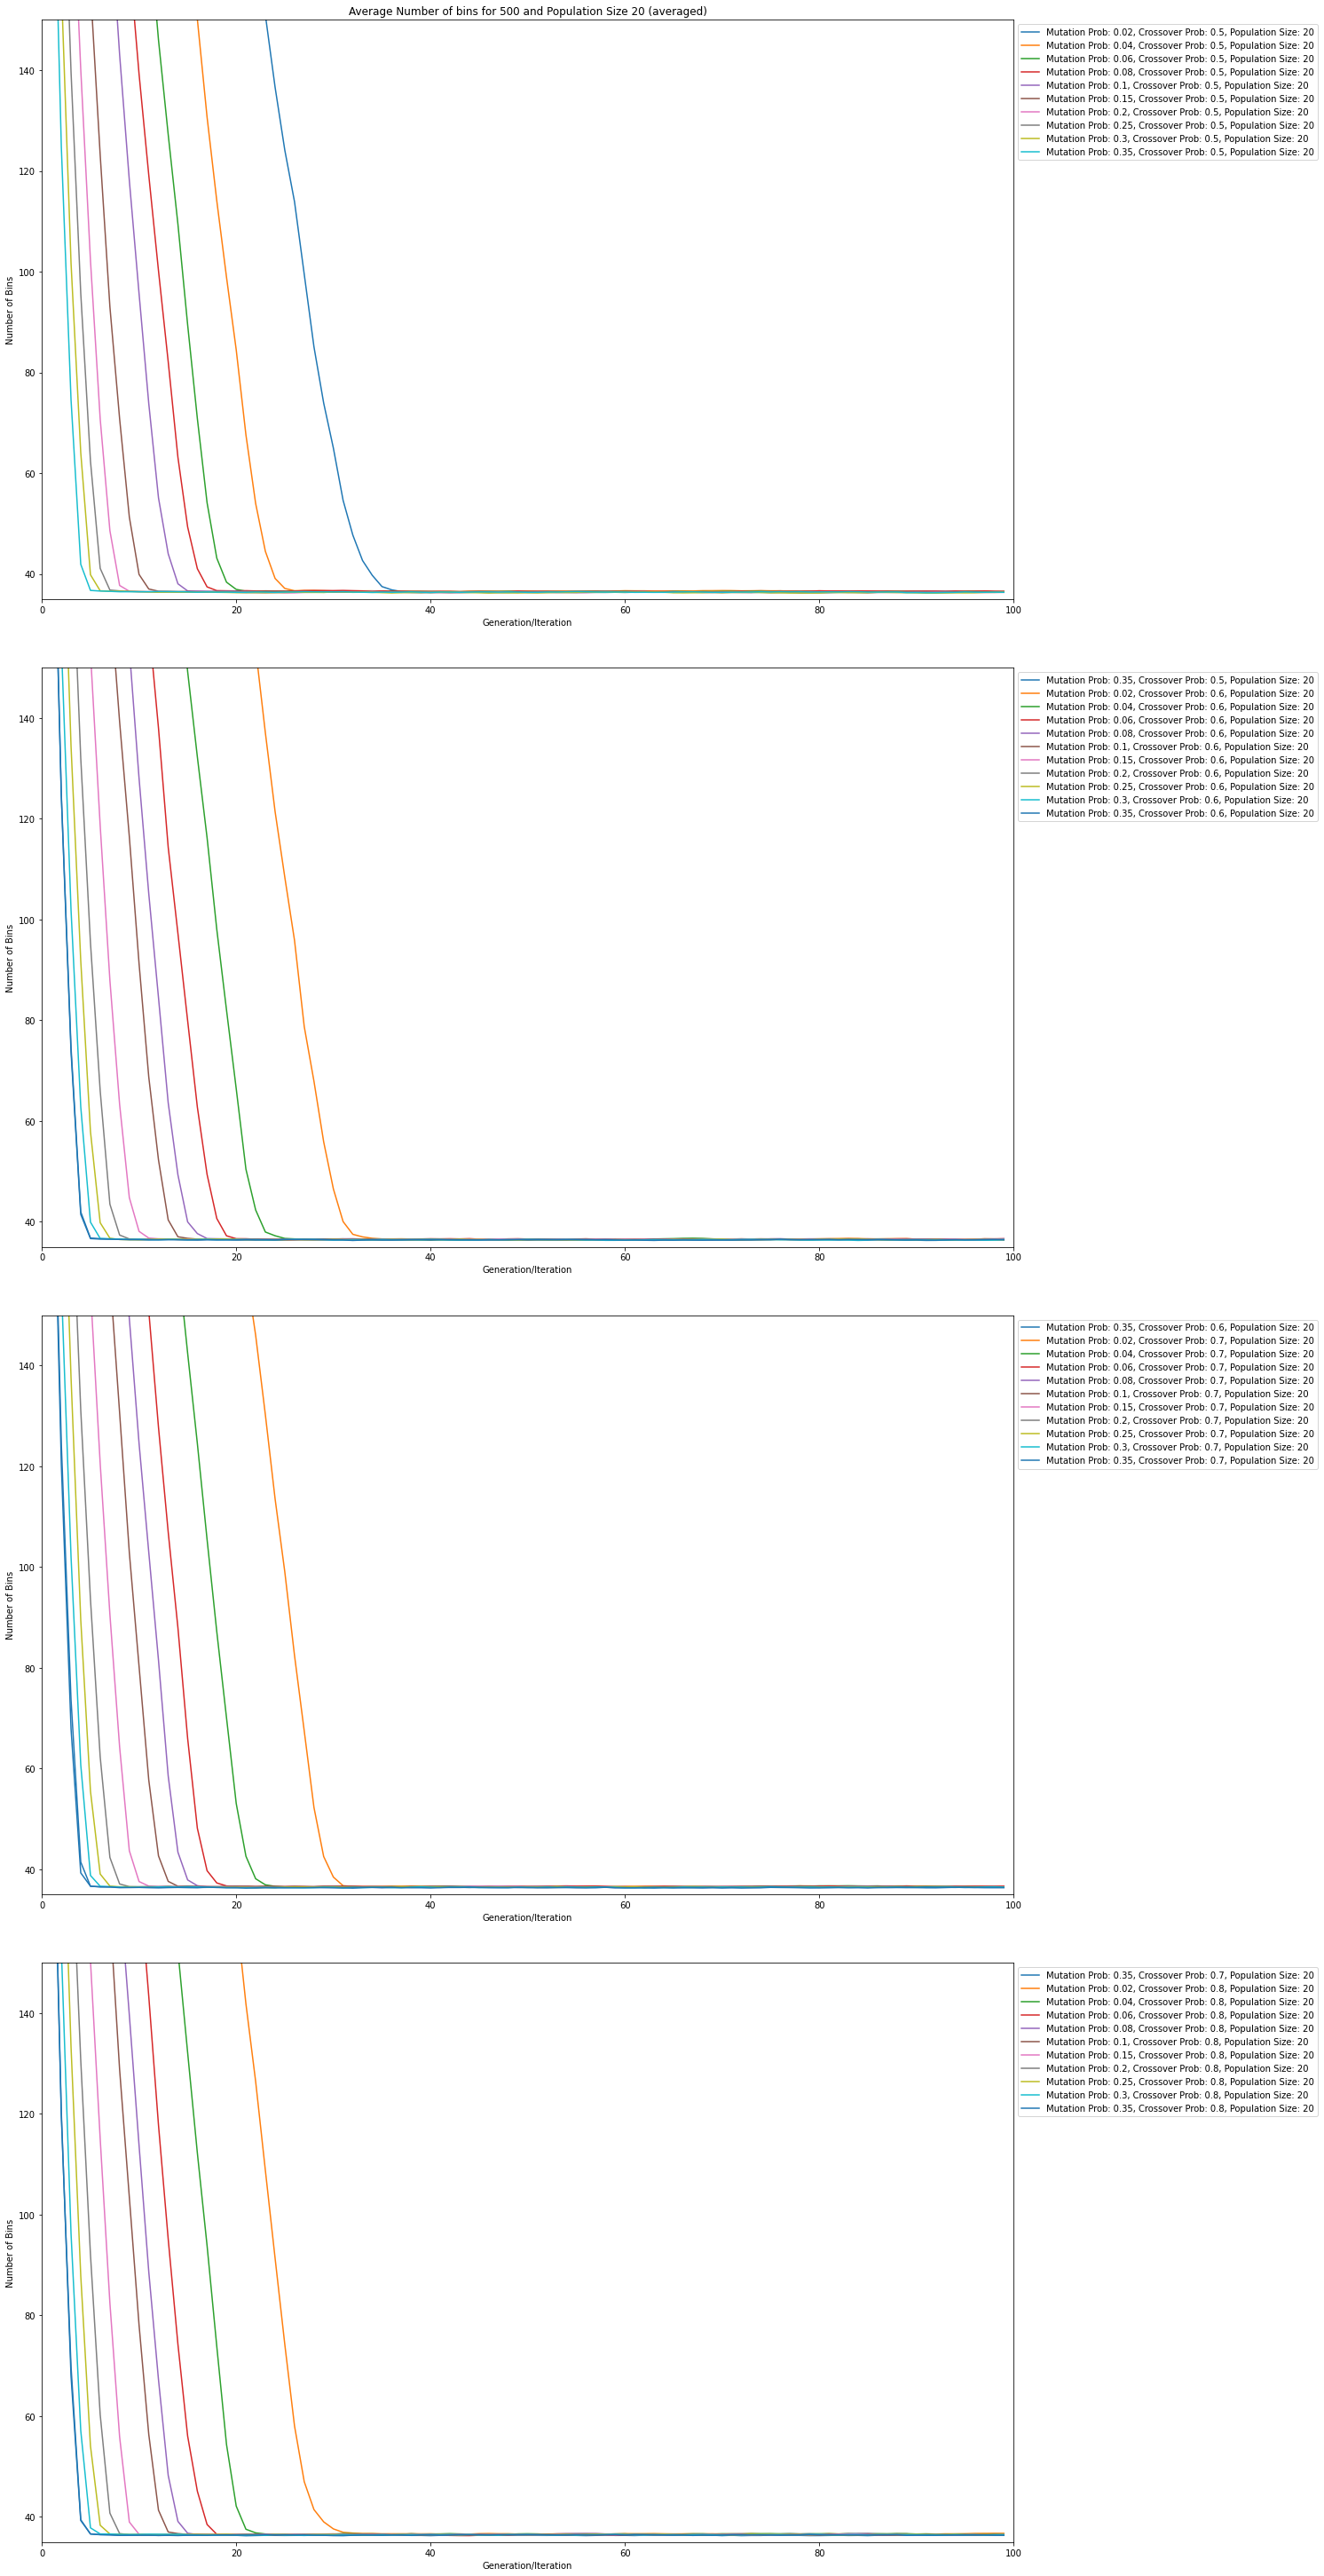

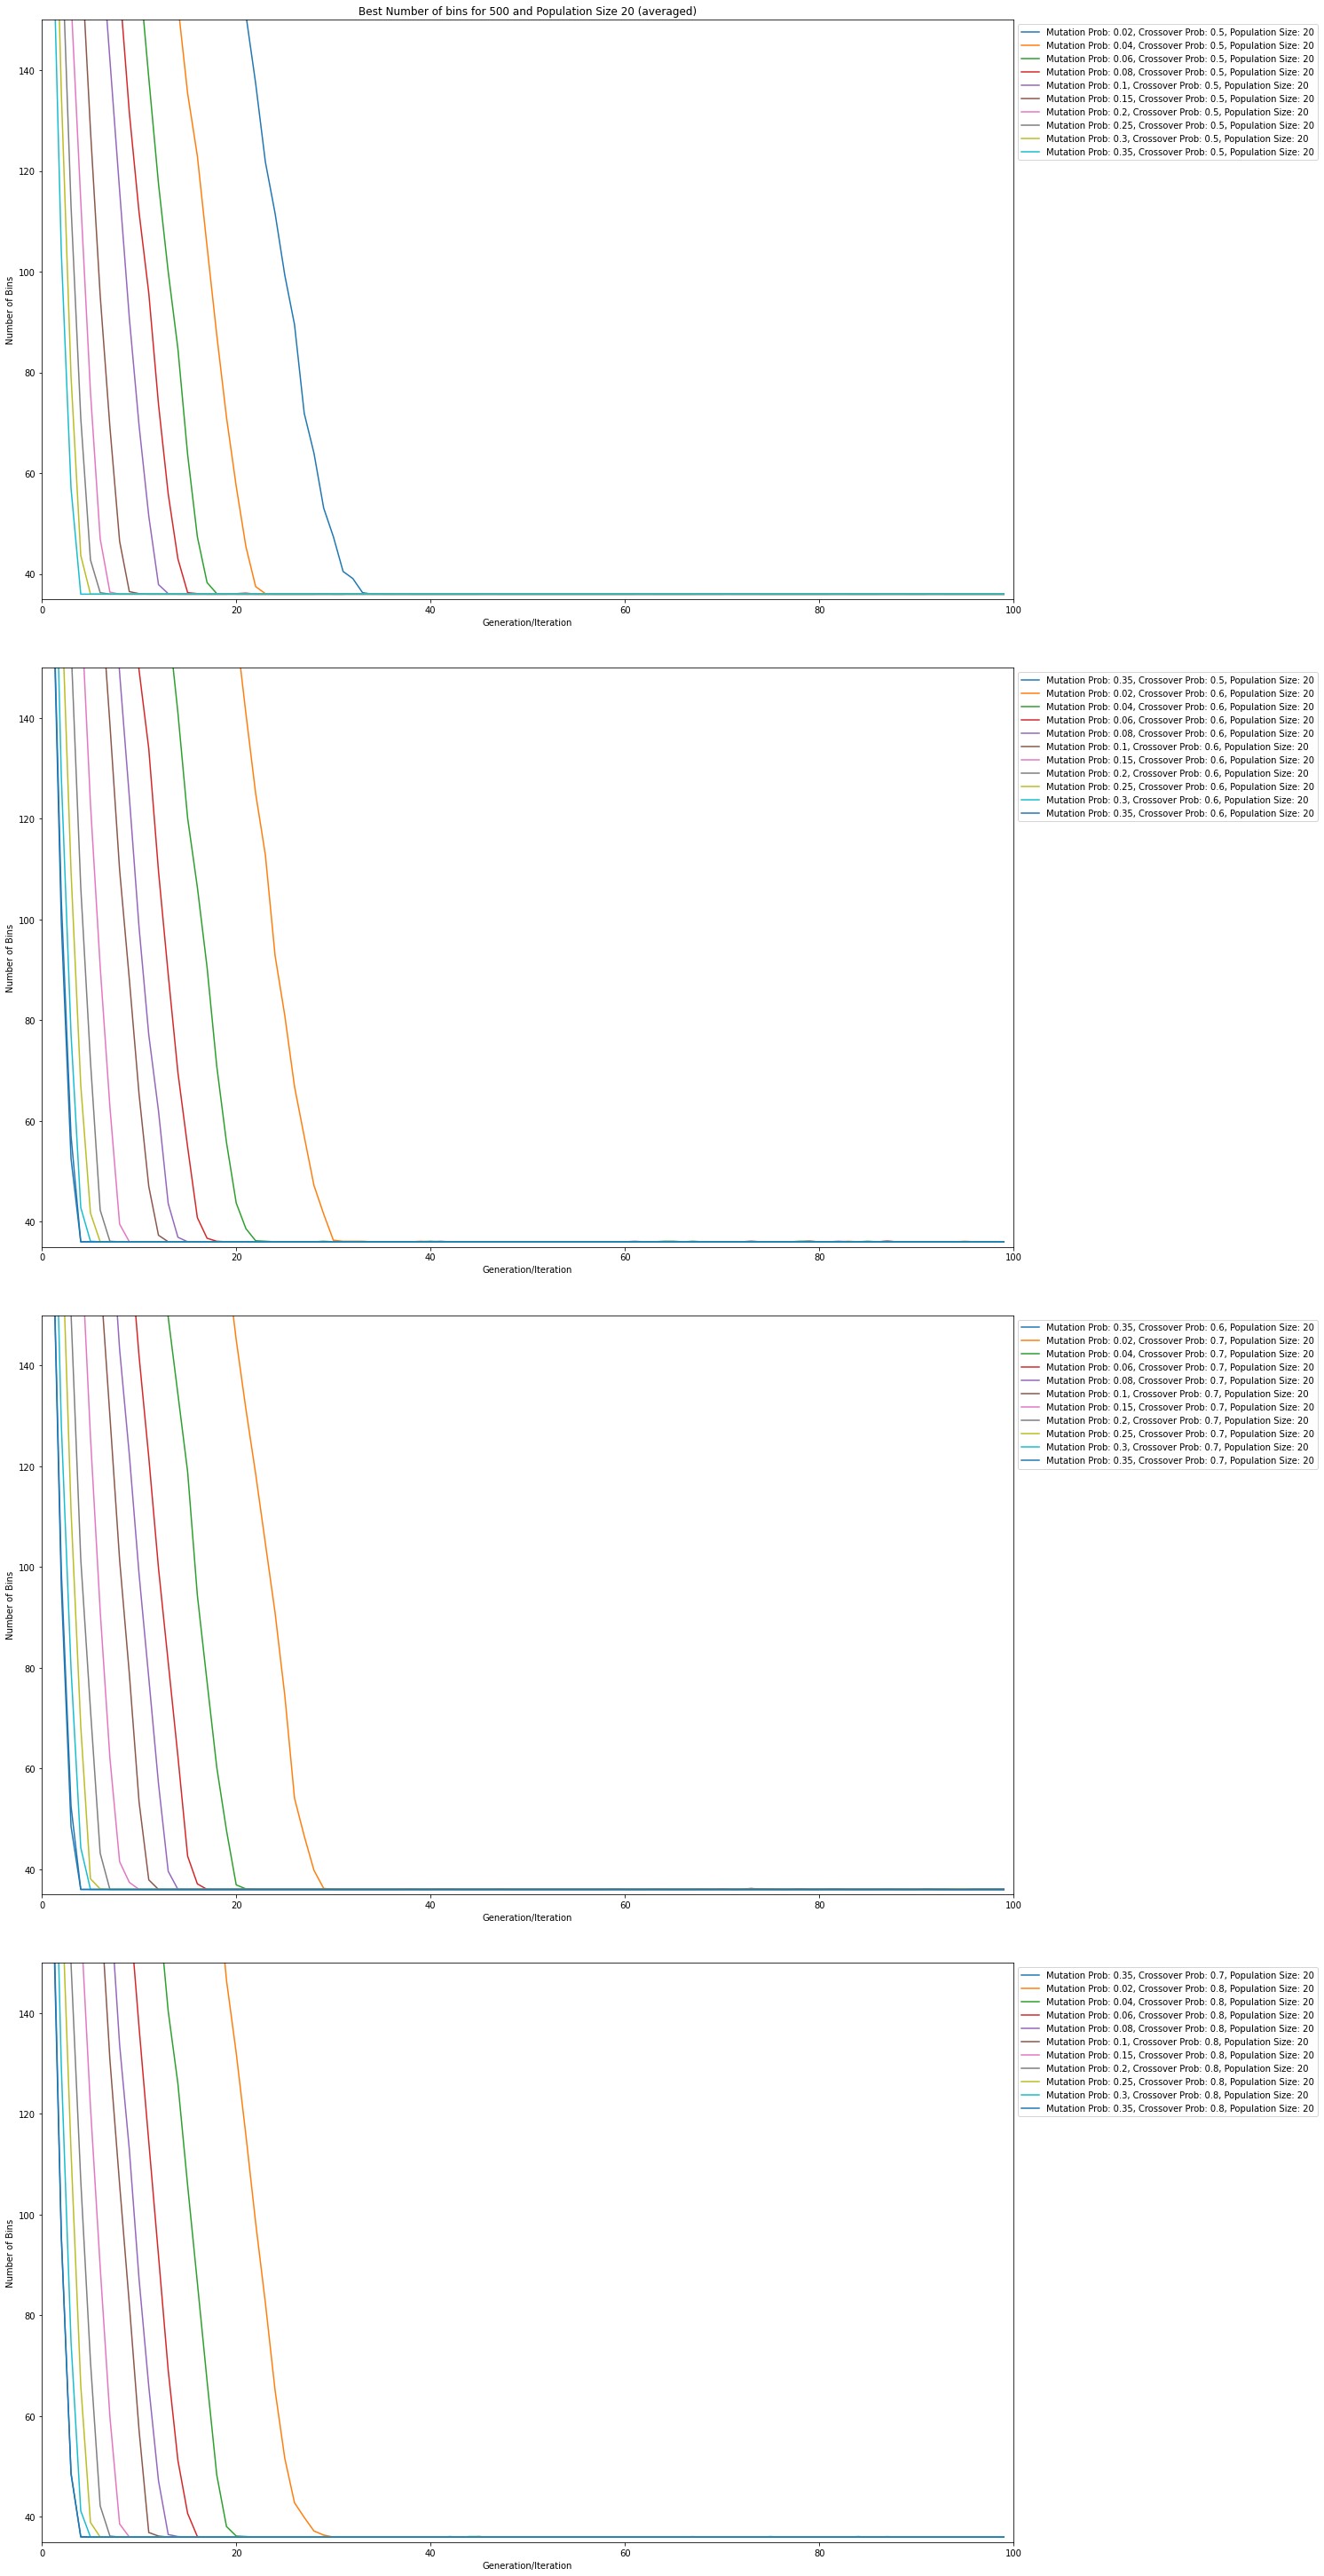

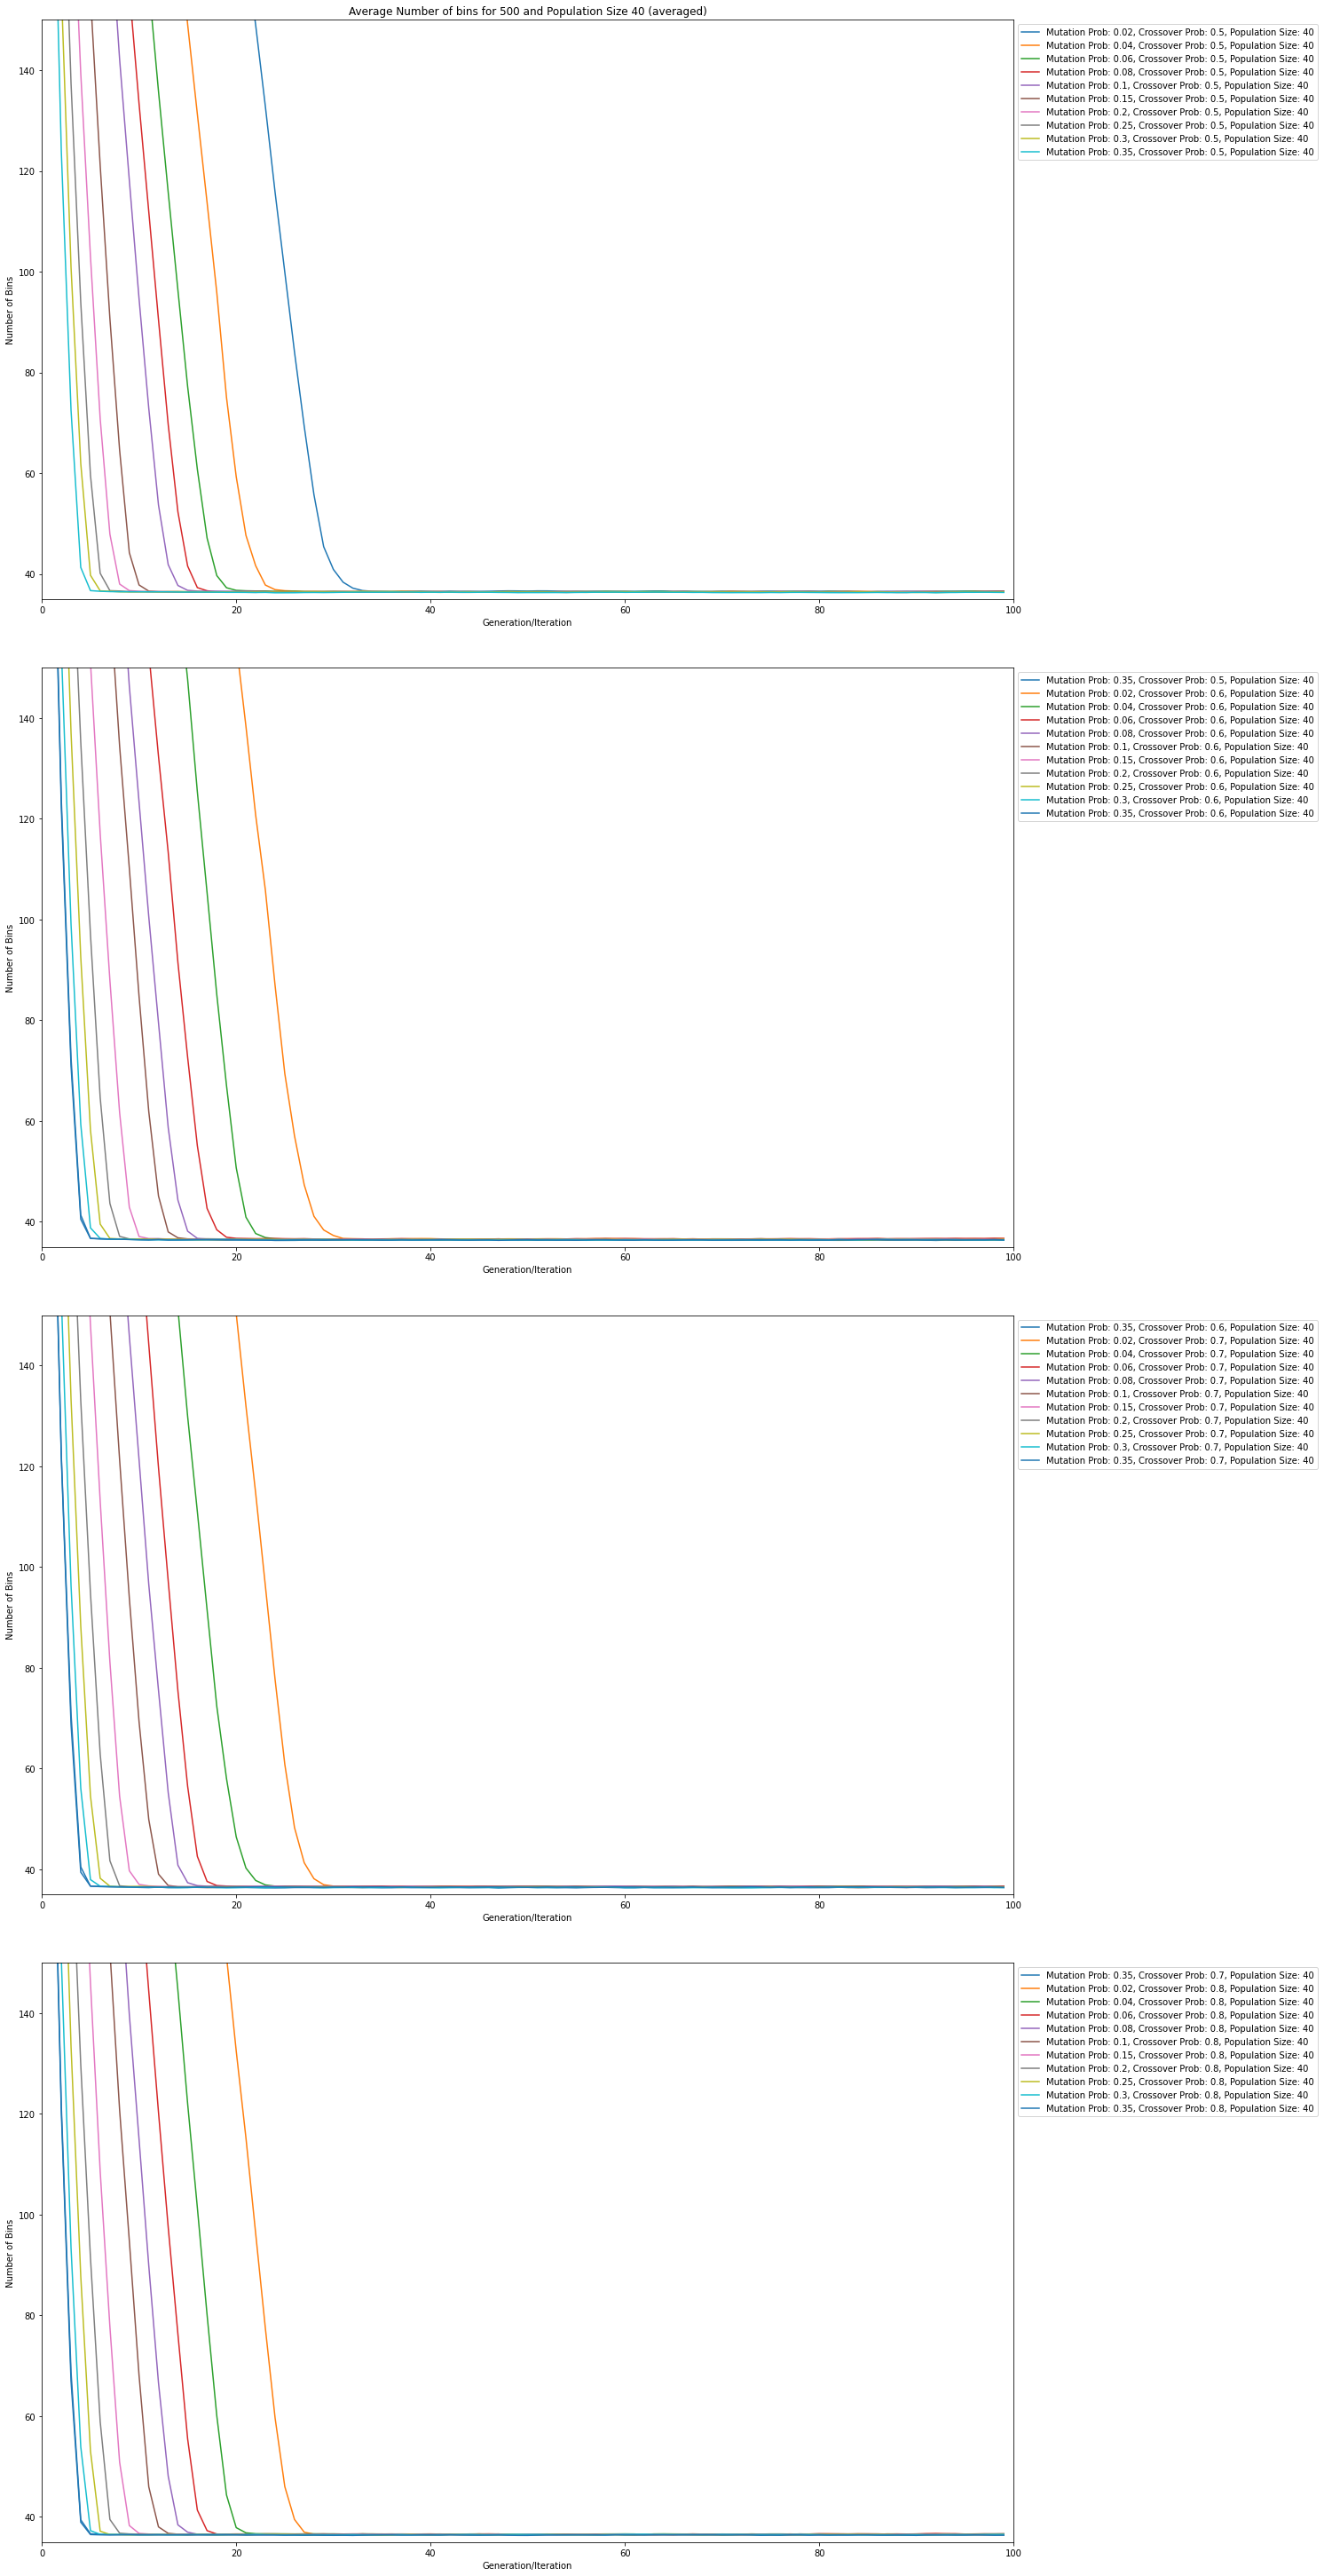

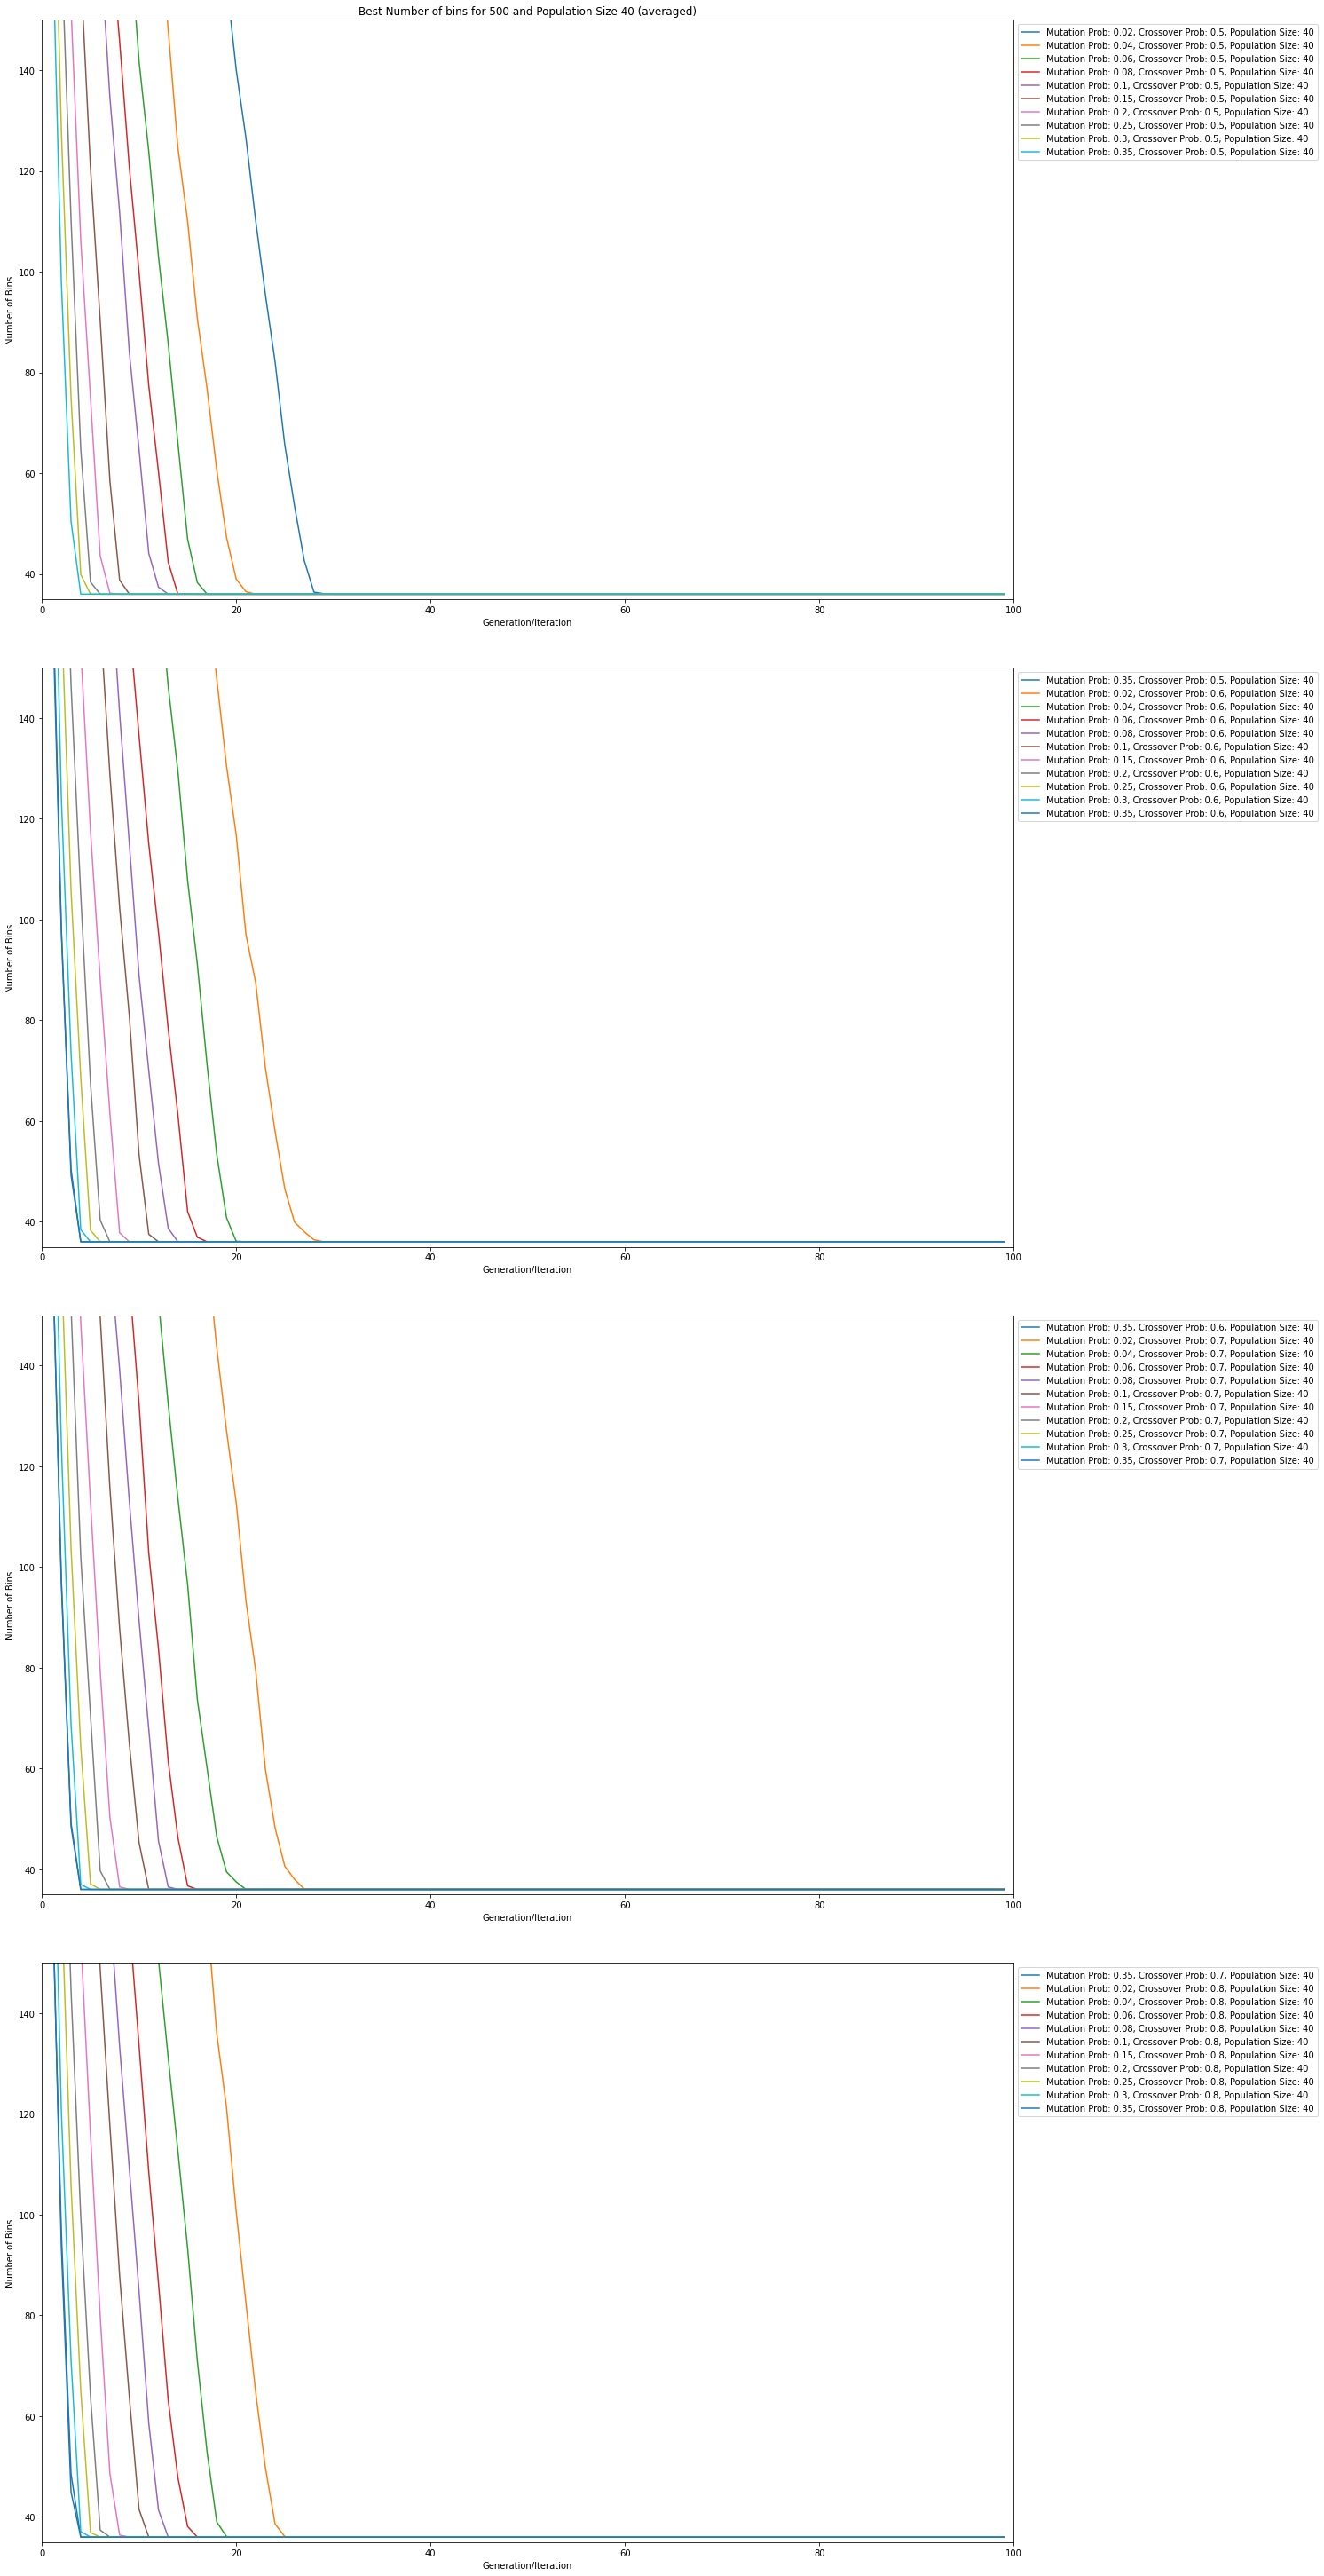

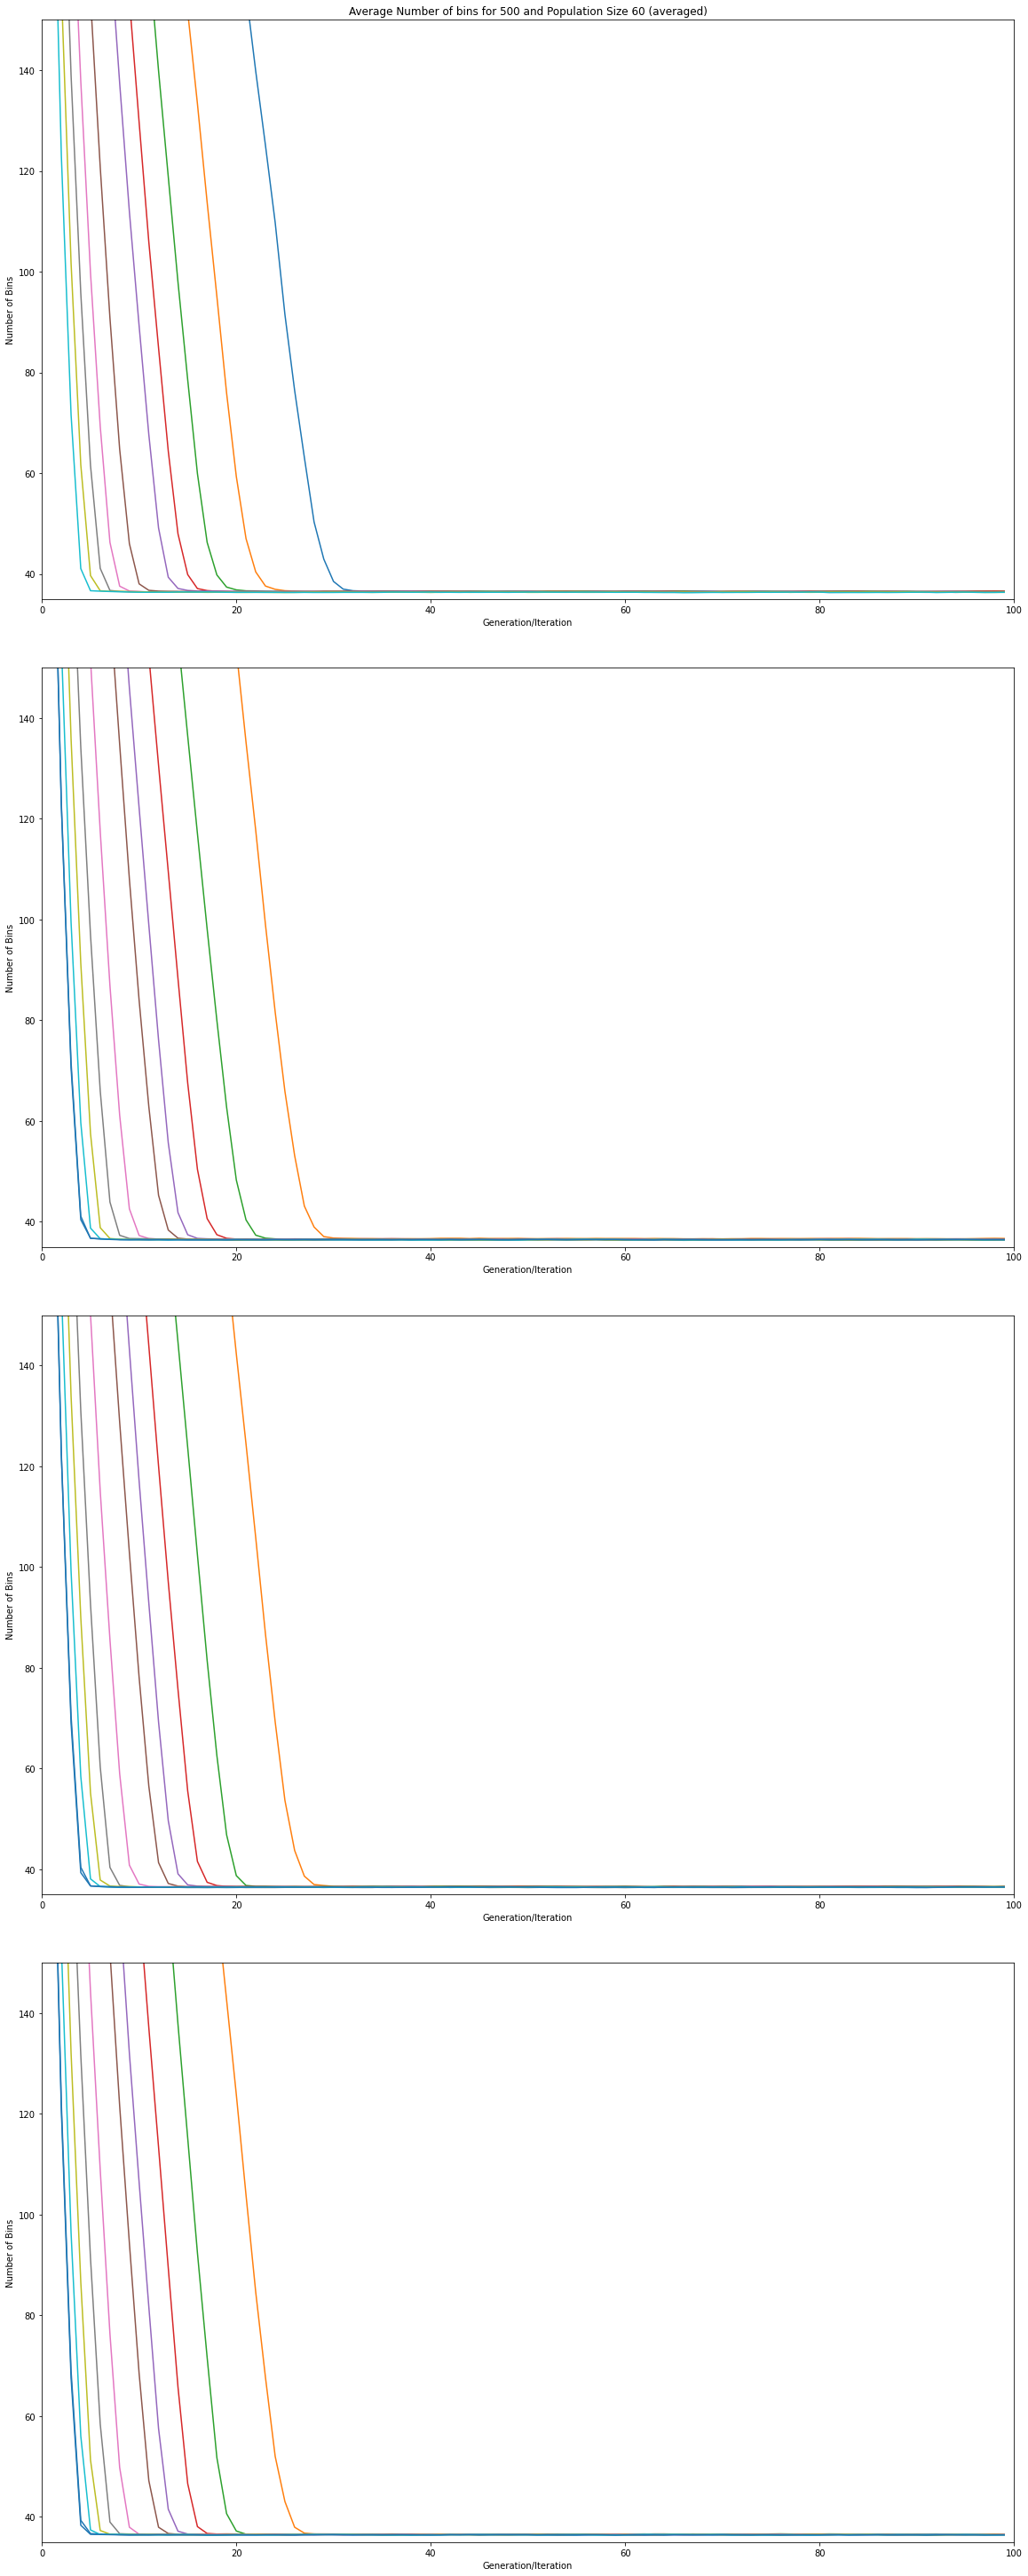

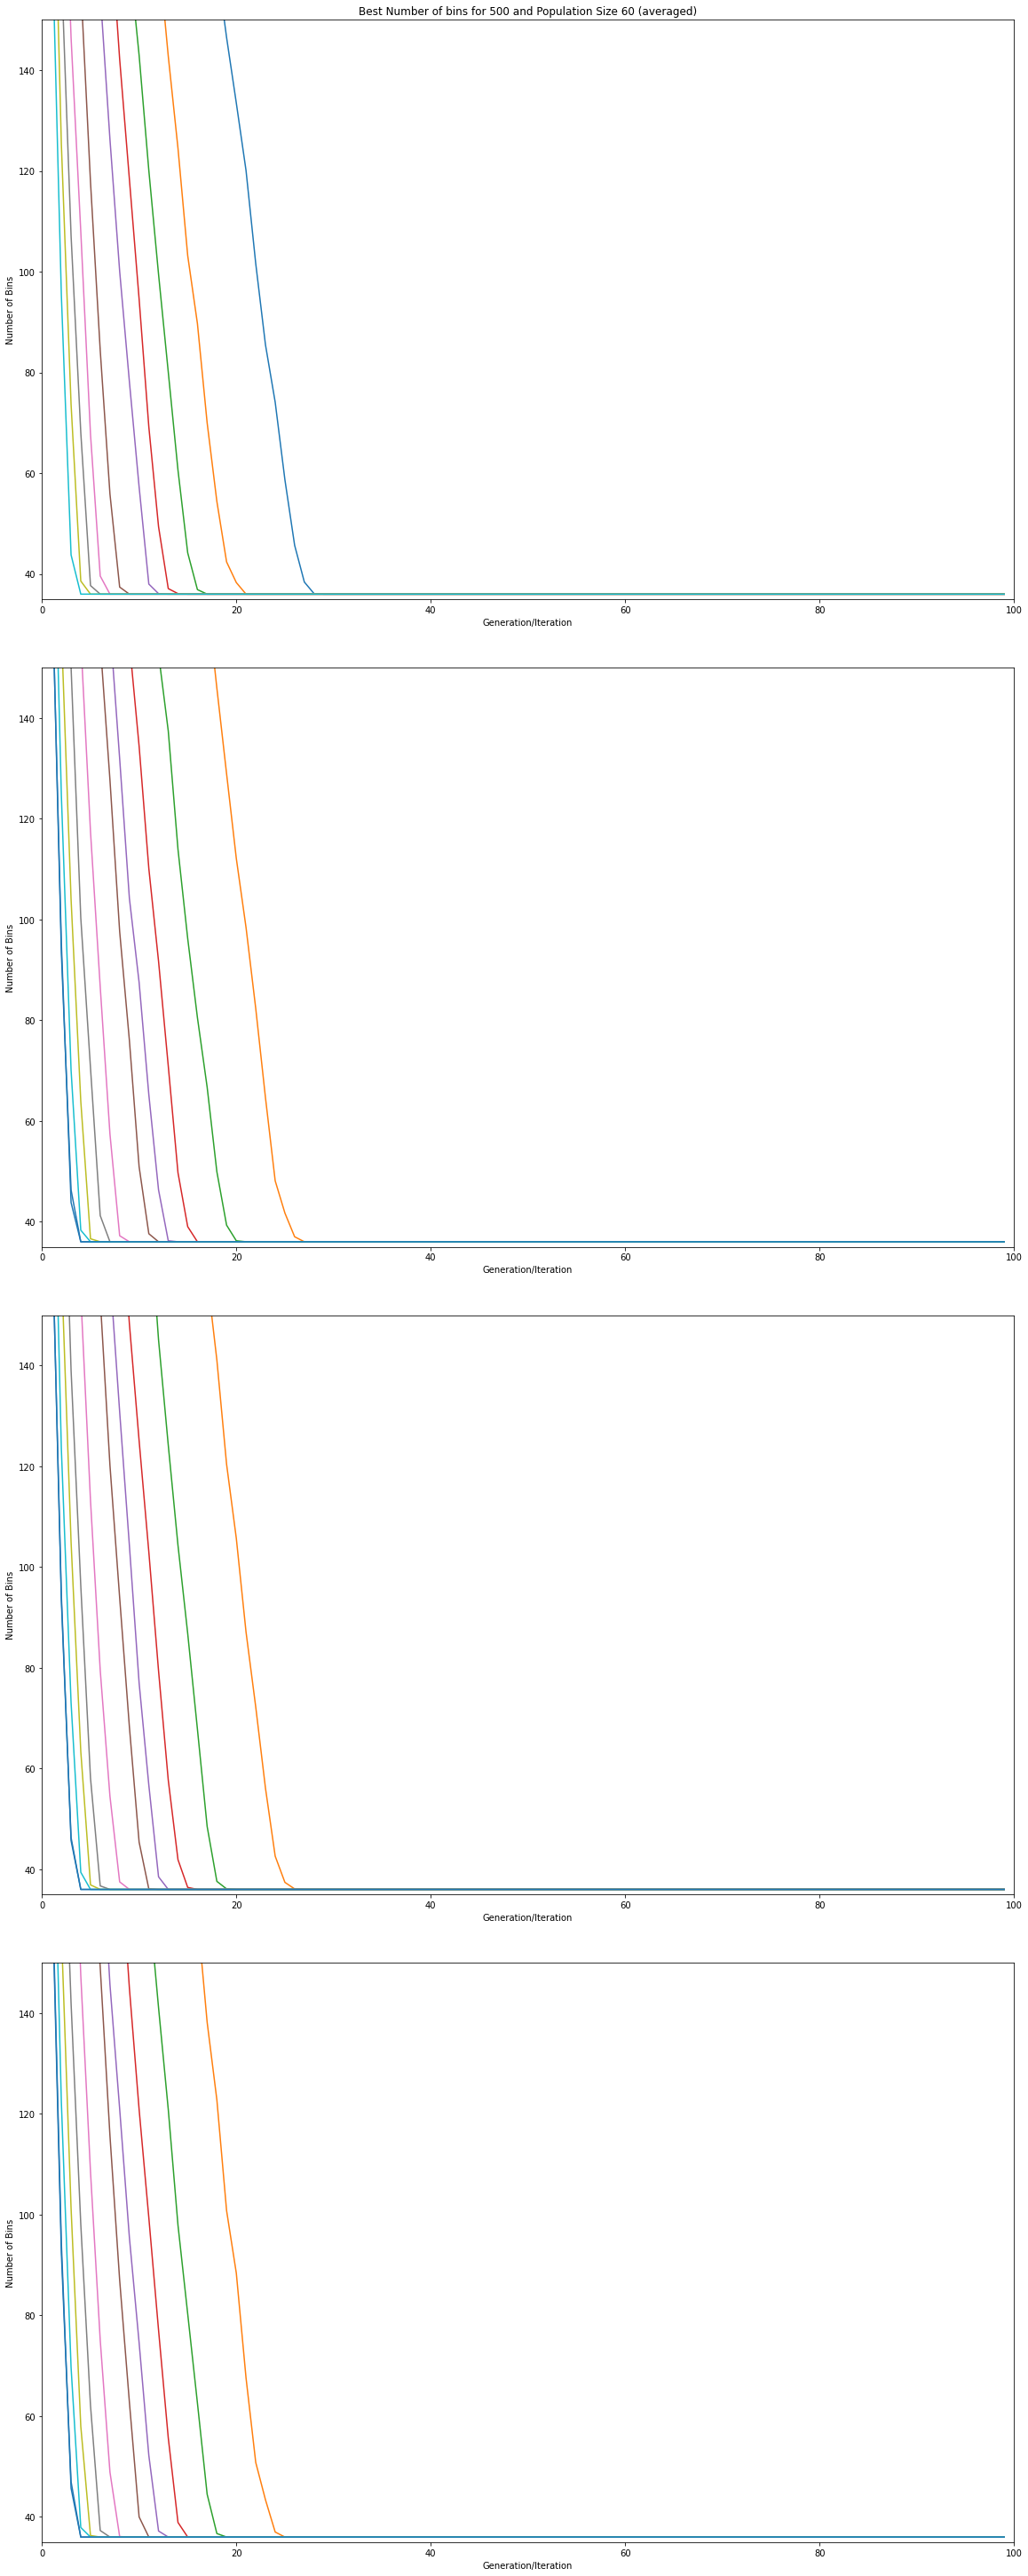

In [8]:
plot_grid_search(large_objects, large_container, large_optimal_solution, [0,60], [30,100])